In [556]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

Dataset extraidos de la página: https://datosabiertos.enacom.gob.ar/dashboards/20000/acceso-a-internet/

1	Penetración del Internet fijo por provincia acceso por cada 100 hogares
2	Penetración del Internet fijo Nacional acceso por cada 100 hogares
3	Por banda ancha y banda angosta Nacional
4	Por banda ancha y banda angosta por provincia
5	Acceso a internet por tipo de tecnología
6	Acceso a internet fijo por tipo de tecnología y provincia
7	Velocidad media de bajada a nivel nacional
8	Velocidad media internet fijo de bajada por provincia x cada 100 hogares
9	Total nacional acceso internet fijo por velocidad de bajada
10	Internet fijo velocidad de bajada por provincia
11	Internet fijo velocidad de bajada por provincia
12	Ingresos por la operación del internet fijo
13	Accesos internet fijo por velocidad de bajada y localidad
14	Accesos internet fijo por tecnología y localidad
15	listado de localidades con conexión a internet
16	Conectividad al servicio de internet

Se analizaran los diferentes campos que posee cada uno de los archivos con miras a integrar algunos.

In [ ]:
# Se cargan cada uno de los archivos de Excel en un DataFrame
df1 = pd.read_excel('1.xlsx')
df2 = pd.read_excel('2.xlsx')
df3 = pd.read_excel('3.xlsx')
df4 = pd.read_excel('4.xlsx')
df5 = pd.read_excel('5.xlsx')
df6 = pd.read_excel('6.xlsx')
df7 = pd.read_excel('7.xlsx')
df8 = pd.read_excel('8.xlsx')
df9 = pd.read_excel('9.xlsx')
df10 = pd.read_excel('10.xlsx')
df11 = pd.read_excel('11.xlsx')
df12 = pd.read_excel('12.xlsx')
df13 = pd.read_excel('13.xlsx')
df14 = pd.read_excel('14.xlsx')
df15 = pd.read_excel('15.xlsx')
df16 = pd.read_excel('16.xlsx')

In [ ]:

# Obtener los títulos de las columnas del DataFrame
titulos_columnas1 = df1.columns
titulos_columnas2 = df2.columns
titulos_columnas3 = df3.columns
titulos_columnas4 = df4.columns
titulos_columnas5 = df5.columns
titulos_columnas6 = df6.columns
titulos_columnas7 = df7.columns
titulos_columnas8 = df8.columns
titulos_columnas9 = df9.columns
titulos_columnas10 = df10.columns
titulos_columnas11= df11.columns
titulos_columnas12 = df12.columns
titulos_columnas13 = df13.columns
titulos_columnas14 = df14.columns
titulos_columnas15 = df15.columns
titulos_columnas16 = df16.columns
print("1: ", titulos_columnas1)
print("2 :", titulos_columnas2)
print("3 :", titulos_columnas3)
print("4 :", titulos_columnas4)
print("5 :", titulos_columnas5)
print("6 :", titulos_columnas6)
print("7 :", titulos_columnas7)
print("8 :", titulos_columnas8)
print("9 :", titulos_columnas9)
print("10 :", titulos_columnas10)
print("11:", titulos_columnas11)
print("12:", titulos_columnas12)
print("13:", titulos_columnas13)
print("14:", titulos_columnas14)
print("15:", titulos_columnas15)
print("16:", titulos_columnas16)

1:  Index(['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hogares'], dtype='object')
2 : Index(['Año', 'Trimestre', 'Accesos por cada 100 hogares',
       'Accesos por cada 100 hab', 'Periodo'],
      dtype='object')
3 : Index(['Año', 'Trimestre', 'Banda ancha fija', 'Dial up', 'Total', 'Periodo'], dtype='object')
4 : Index(['Año', 'Trimestre', 'Provincia', 'Banda ancha fija', 'Dial up',
       'Total'],
      dtype='object')
5 : Index(['Año', 'Trimestre', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless',
       'Otros', 'Total', 'Periodo'],
      dtype='object')
6 : Index(['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'Total'],
      dtype='object')
7 : Index(['Año', 'Trimestre', 'Mbps (Media de bajada)', 'Trimestre.1'], dtype='object')
8 : Index(['Año', 'Trimestre', 'Provincia', 'Mbps (Media de bajada)'], dtype='object')
9 : Index(['Año', 'Trimestre', 'Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps',
       'Entre 1 Mbps y 6 Mbp

Se observa que hay tres tipos de dataset asi:
1 Dataset Provincias: 1,4,6,8,10,11 que contienen las columnas Año, Trimestre y Provincia
Nacional: 2,3,5,7,9,12 donde se encuentran los datos a nivel nacional: Año y Trimestre y opcional Periodo.
Conectividad: 13,14,15,16 con las columnas Provincia, Partido y localidad

Procedo a mirar mas el detalle de los datos para ver si es posible unirlos adecuadamente según los tipos de datos que contengan.

Se inicia con el analisis de estos archivos en este orden con el fin de proceder a un merge posterior:  1,4,6,8,10,11


In [ ]:
# Imprime los tipos de datos de cada columna
print(df1.dtypes)
print(df1.info)


Año                               int64
Trimestre                         int64
Provincia                        object
Accesos por cada 100 hogares    float64
dtype: object
<bound method DataFrame.info of       Año  Trimestre            Provincia  Accesos por cada 100 hogares
0    2022          3         Buenos Aires                         78.11
1    2022          3      Capital Federal                        122.28
2    2022          3            Catamarca                         65.33
3    2022          3                Chaco                         43.86
4    2022          3               Chubut                         84.38
..    ...        ...                  ...                           ...
835  2014          1           Santa Cruz                         28.94
836  2014          1             Santa Fe                         47.85
837  2014          1  Santiago Del Estero                         16.31
838  2014          1     Tierra Del Fuego                         63.97
83

Se revisan los valores unicos del dataset para comprender que información contiene

In [ ]:
def datos_unicos(datafram_analisis):
    for column in datafram_analisis.columns:
        unique_values = datafram_analisis[column].unique()
        respuesta= print(f"Valores únicos por columna '{column}':", unique_values)
    return respuesta

In [ ]:
datos_unicos(df1)

Valores únicos por columna 'Año': [2022 2021 2020 2019 2018 2017 2016 2015 2014]
Valores únicos por columna 'Trimestre': [3 2 1 4]
Valores únicos por columna 'Provincia': ['Buenos Aires' 'Capital Federal' 'Catamarca' 'Chaco' 'Chubut' 'Córdoba'
 'Corrientes' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa' 'La Rioja'
 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan' 'San Luis'
 'Santa Cruz' 'Santa Fe' 'Santiago Del Estero' 'Tierra Del Fuego'
 'Tucumán']
Valores únicos por columna 'Accesos por cada 100 hogares': [ 78.11 122.28  65.33  43.86  84.38  88.31  48.21  63.67  43.76  58.91
  96.59  80.66  51.03  51.82  80.37  67.98  57.76  50.8   81.74  43.19
  78.55  47.98  99.51  61.14  77.58 121.31  62.4   43.79  83.19  87.48
  48.35  63.9   43.42  57.32  92.98  80.14  49.39  51.    80.02  67.85
  57.54  49.46  81.76  43.15  77.9   47.7   99.86  59.31  76.08 111.8
  58.21  44.06  88.05  85.76  47.64  63.7   34.96  58.06  91.66  78.77
  48.74  49.04  74.17  67.04  56.11  43.55  80.72  43

Se observa que los datos de la columna Acceso por cada 100 hogares requerira transformación a numero

In [ ]:
df1['Accesos por cada 100 hogares']  = df1['Accesos por cada 100 hogares'] .astype(str).str.replace('.', ',')
df1.head(5)


,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,"78,11"
1,2022,3,Capital Federal,"122,28"
2,2022,3,Catamarca,"65,33"
3,2022,3,Chaco,"43,86"
4,2022,3,Chubut,"84,38"


In [ ]:
df1.describe() # describe las columnas numericas

,Año,Trimestre
count,840.000000,840.000000
mean,2017.885714,2.457143
std,2.528745,1.105009
min,2014.000000,1.000000
25%,2016.000000,1.000000
50%,2018.000000,2.000000
75%,2020.000000,3.000000
max,2022.000000,4.000000


Analisis de las Correlaciones entre variables

In [ ]:
accesoMax= max(df1['Accesos por cada 100 hogares'])
accesoMin=min(df1['Accesos por cada 100 hogares'])
print("max: ", accesoMax, "minimo: ", accesoMin)


max:  99,86 minimo:  10,59


In [ ]:
df1graf1=df1
df1graf1['Accesos por cada 100 hogares'] = df1graf1['Accesos por cada 100 hogares'].str.replace(',', '.')
df1graf1['Accesos por cada 100 hogares'] = pd.to_numeric(df1graf1['Accesos por cada 100 hogares'], errors='coerce')
df1graf1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           840 non-null    int64  
 1   Trimestre                     840 non-null    int64  
 2   Provincia                     840 non-null    object 
 3   Accesos por cada 100 hogares  840 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 26.4+ KB


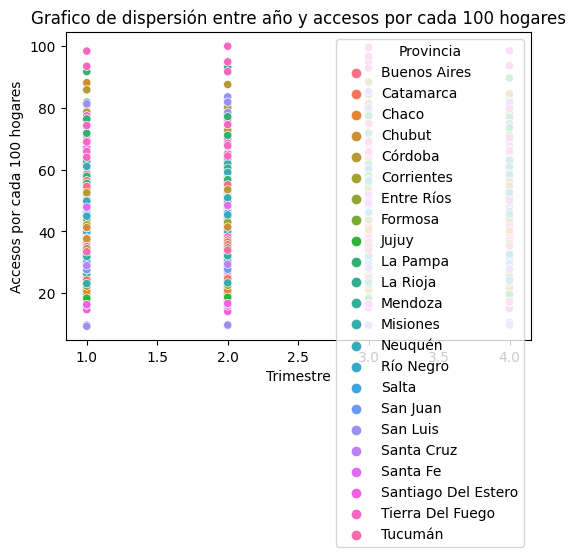

In [ ]:

# Filtrar valores que sean menores que 'accesolimite'
accesolimite = 100
df_filtered = df1graf1[df1graf1['Accesos por cada 100 hogares'] < accesolimite]

# Graficar el resultado
fig = plt.figure(figsize=(6,4))
sns.scatterplot(x='Trimestre', y='Accesos por cada 100 hogares', hue='Provincia', data=df_filtered)
#se filtra por provincia

plt.title('Grafico de dispersión entre año y accesos por cada 100 hogares')
plt.show()

In [ ]:
# cantidad de duplicados
column_names=df1.columns
n_duplicates=df1.drop(labels=column_names,axis=1).duplicated().sum
n_duplicates

<bound method NDFrame._add_numeric_operations.<locals>.sum of Series([], dtype: bool)>

Aparece tal como se esperaba, una tendencia por cada año uniforme con alta correlación

In [ ]:
# describe las columnas numericas
df4.describe()


,Año,Trimestre,Banda ancha fija,Total
count,840.000000,840.000000,8.400000e+02,8.400000e+02
mean,2017.885714,2.457143,3.447674e+05,3.457417e+05
std,2.528745,1.105009,7.400503e+05,7.419436e+05
min,2014.000000,1.000000,1.219300e+04,1.255700e+04
25%,2016.000000,1.000000,5.192225e+04,5.202975e+04
50%,2018.000000,2.000000,1.029360e+05,1.034895e+05
75%,2020.000000,3.000000,1.778685e+05,1.779148e+05
max,2022.000000,4.000000,4.715469e+06,4.721668e+06


In [ ]:
datos_unicos(df4)

Valores únicos por columna 'Año': [2022 2021 2020 2019 2018 2017 2016 2015 2014]
Valores únicos por columna 'Trimestre': [3 2 1 4]
Valores únicos por columna 'Provincia': ['Buenos Aires' 'Capital Federal' 'Catamarca' 'Chaco' 'Chubut' 'Córdoba'
 'Corrientes' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa' 'La Rioja'
 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan' 'San Luis'
 'Santa Cruz' 'Santa Fe' 'Santiago Del Estero' 'Tierra Del Fuego'
 'Tucumán']
Valores únicos por columna 'Banda ancha fija': [4715469 1545534   70292  144141  164874 1038600  144842  268937   68537
  118823  115921   86860  288746  182157  162693  160010  204536  103118
  121888   49312  887700  119030   53584  263087 4660984 1534626   67007
  143559  161901 1026367  144993  269330   67881  115314  111356   86026
  278785  178813  161500  159216  203172  100126  121559   48987  878749
  118042   53458  254497 4549131 1415378   62377  144114  170701 1003729
  142574  267904   54548  116509  109560   84299  27

Analisis de dispersión en datos del df4 que contiene las siguientes variables:
Año                  int64
Trimestre            int64
Provincia           object
Banda ancha fija     int64
Dial up             object
Total                int64

In [ ]:
ValorbandaMax= max(df4['Banda ancha fija'])
print("maximo banda: ", ValorbandaMax)


maximo banda:  4715469


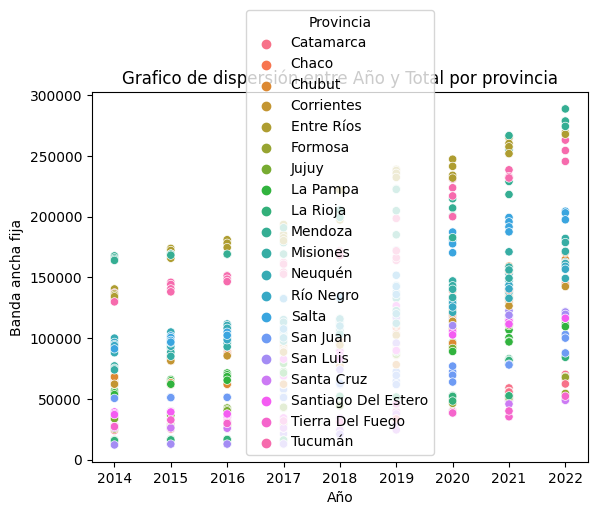

In [ ]:
df4graf4=df4
# Filtrar valores que sean menores que 'Valortotalmax'
ValorbandaMax= 472000
df_filtered4 = df4graf4[df4graf4['Banda ancha fija'] < ValorbandaMax]

# Graficar el resultado
#fig = plt.figure(figsize=(6,4))
sns.scatterplot(x='Año', y='Banda ancha fija', hue='Provincia', data=df_filtered4)
#se filtra por provincia

plt.title('Grafico de dispersión entre Año y Total por provincia')
plt.show()

In [ ]:
df6 = pd.read_excel('6.xlsx')

In [ ]:
# Imprime los tipos de datos de cada columna
print(df6.dtypes)
print(df6.info)


Año              object
Trimestre        object
Provincia        object
ADSL            float64
Cablemodem      float64
Fibra óptica    float64
Wireless        float64
Otros           float64
Total           float64
dtype: object
<bound method DataFrame.info of       Año                                          Trimestre   
0    2022                                                  3  \
1    2022                                                  3   
2    2022                                                  3   
3    2022                                                  3   
4    2022                                                  3   
..    ...                                                ...   
836  2014                                                  1   
837  2014                                                  1   
838  2014                                                  1   
839  2014                                                  1   
840     *  Los datos provinciales 

In [ ]:
df6.describe()

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,8.400000e+02,8.400000e+02,8.400000e+02,840.000000,840.000000,8.400000e+02
mean,1.275668e+05,1.717750e+05,2.991186e+04,10345.001190,6142.961905,3.457417e+05
std,2.550543e+05,4.221661e+05,1.235013e+05,18192.024086,10572.152928,7.419436e+05
min,6.842000e+03,0.000000e+00,0.000000e+00,0.000000,2.000000,1.255700e+04
25%,2.247925e+04,8.599750e+03,1.860000e+02,253.000000,307.250000,5.202975e+04
50%,4.859600e+04,3.498400e+04,1.093000e+03,4261.500000,1852.000000,1.034895e+05
75%,1.045695e+05,7.074850e+04,1.386250e+04,12435.000000,6915.500000,1.779148e+05
max,1.586343e+06,2.748325e+06,1.436433e+06,126887.000000,73415.000000,4.721668e+06


In [ ]:
datos_unicos(df6)

Valores únicos por columna 'Año': ['2022' '2021' '2020' '2019' '2019 *' '2018' '2017' '2016' '2015' '2014'
 '*']
Valores únicos por columna 'Trimestre': ['3' '2' '1' '4' '3 *' '2 *' '1 *'
 'Los datos provinciales no coinciden a nivel nacional, ya que se rincorporó información que no contien apertuta a nivel geográfico.']
Valores únicos por columna 'Provincia': ['Buenos Aires' 'Capital Federal' 'Catamarca' 'Chaco' 'Chubut' 'Córdoba'
 'Corrientes' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa' 'La Rioja'
 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan' 'San Luis'
 'Santa Cruz' 'Santa Fe' 'Santiago Del Estero' 'Tierra Del Fuego'
 'Tucumán' nan]
Valores únicos por columna 'ADSL': [ 339648.  140791.   10010.   27164.   45377.  163770.   36508.   60345.
   14470.   19257.    7796.    6842.   37659.   35513.   29352.   35552.
   40006.   38570.    6860.   10170.  183740.   15385.   12754.   77738.
  350652.  145491.   11928.   29552.  179181.   38468.   63794.   15397.
   20303.    7

In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           841 non-null    object 
 1   Trimestre     841 non-null    object 
 2   Provincia     840 non-null    object 
 3   ADSL          840 non-null    float64
 4   Cablemodem    840 non-null    float64
 5   Fibra óptica  840 non-null    float64
 6   Wireless      840 non-null    float64
 7   Otros         840 non-null    float64
 8   Total         840 non-null    float64
dtypes: float64(6), object(3)
memory usage: 59.3+ KB


Text(0, 0.5, 'Valores numericos')

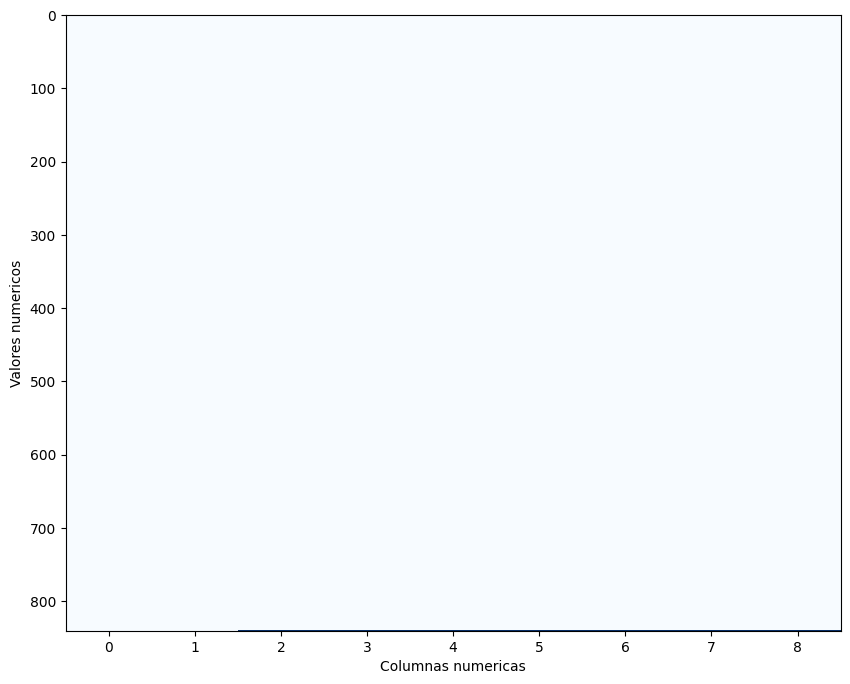

In [ ]:
# revisar los valores nulos
plt.figure(figsize=(10,8))
plt.imshow(df6.isna(),aspect="auto", 
           interpolation="nearest",cmap="Blues")
plt.xlabel("Columnas numericas")
plt.ylabel("Valores numericos")

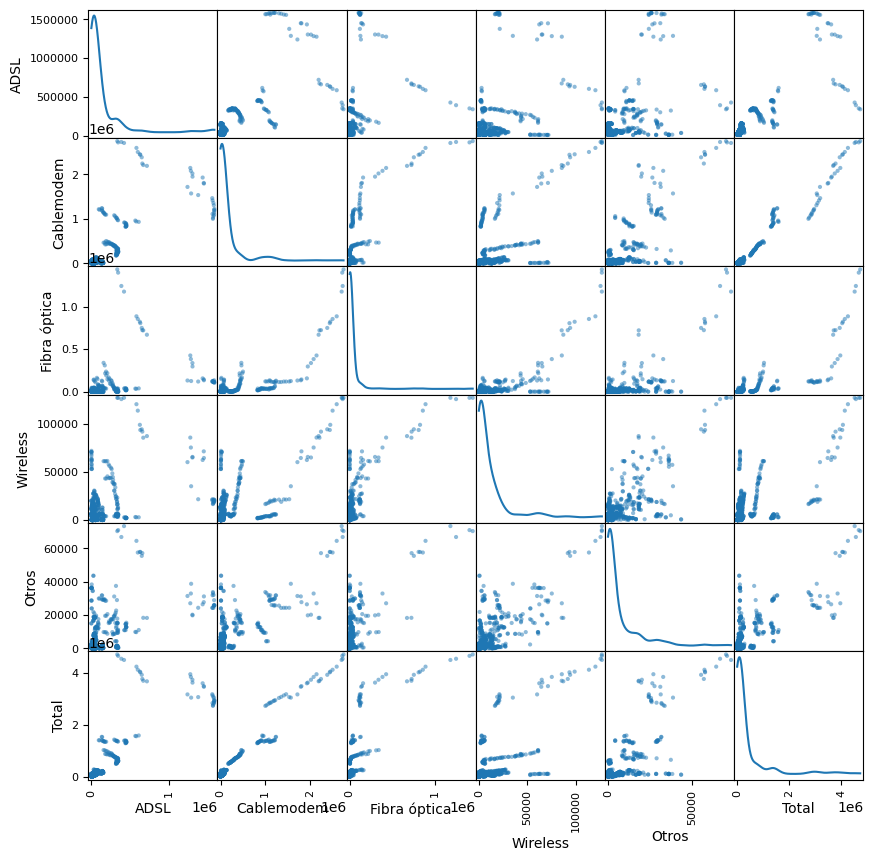

In [ ]:
# selecciono solo las columnas numéricas
df_numeric = df6.select_dtypes(include=['int64', 'float64'])
# crea una matriz de gráficos de dispersión
scatter_matrix(df_numeric, figsize=(10, 10), diagonal='kde')

# muestra el gráfico
plt.show()



En este caso requiere cambios de tipo en las columnas del tipo de servicio que se presta: ADSL, cablemodem, Fibra óptica, wireless, otros.
las columnas año y trimestre se llenan los campos vacios con 0.
Se convierten algunas tipo objet a entero
Tanto las columnas Año como Trimestre deben de corresponder a tipo int64

In [ ]:
df6 = df6.fillna(0)

In [ ]:

df6['Año'] = df6['Año'].str.replace(' ', '')
df6['Año'] = df6['Año'].str.replace('*', '')
#df6['Año'] = df6['Año'].str.replace('*', '0')
df6['Trimestre'] = df6['Trimestre'].str.replace('*', '')
df6['Año'] = df6['Año'].str.strip()
df6['Trimestre'] = df6['Trimestre'].str.strip()
df6['Año'] = pd.to_numeric(df6['Año'], errors='coerce').fillna(0).astype(int) # Convertir valores restantes a números enteros
df6['Trimestre'] = pd.to_numeric(df6['Trimestre'], errors='coerce').fillna(0).astype(int) # Convertir valores restantes a números enteros
df6['Año'] = pd.to_numeric(df6['Año'], errors='coerce').fillna(0).astype(int) # Convertir valores restantes a números enteros

In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           841 non-null    int32  
 1   Trimestre     841 non-null    int32  
 2   Provincia     841 non-null    object 
 3   ADSL          841 non-null    float64
 4   Cablemodem    841 non-null    float64
 5   Fibra óptica  841 non-null    float64
 6   Wireless      841 non-null    float64
 7   Otros         841 non-null    float64
 8   Total         841 non-null    float64
dtypes: float64(6), int32(2), object(1)
memory usage: 52.7+ KB


In [ ]:
datos_unicos(df6)

Valores únicos por columna 'Año': [2022 2021 2020 2019 2018 2017 2016 2015 2014    0]
Valores únicos por columna 'Trimestre': [3 2 1 4 0]
Valores únicos por columna 'Provincia': ['Buenos Aires' 'Capital Federal' 'Catamarca' 'Chaco' 'Chubut' 'Córdoba'
 'Corrientes' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa' 'La Rioja'
 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan' 'San Luis'
 'Santa Cruz' 'Santa Fe' 'Santiago Del Estero' 'Tierra Del Fuego'
 'Tucumán' 0]
Valores únicos por columna 'ADSL': [ 339648.  140791.   10010.   27164.   45377.  163770.   36508.   60345.
   14470.   19257.    7796.    6842.   37659.   35513.   29352.   35552.
   40006.   38570.    6860.   10170.  183740.   15385.   12754.   77738.
  350652.  145491.   11928.   29552.  179181.   38468.   63794.   15397.
   20303.    7759.   37663.   37208.   29749.   36050.   42665.  198492.
   16561.   85893.  392045.  102290.   14181.   32391.   44133.  195610.
   40462.   67159.   16397.   21307.    8003.    9103. 

In [ ]:
df6 = df6.rename(columns={"Total": "Total_fijo_xtipo_tecnologia_provincia"})

In [ ]:
df6['ADSL'] = df6['ADSL'].astype('int64')
df6['Cablemodem'] = df6['Cablemodem'].astype('int64')
df6['Fibra óptica'] = df6['Fibra óptica'].astype('int64')
df6['Wireless'] = df6['Wireless'].astype('int64')
df6['Otros'] = df6['Otros'].astype('int64')



In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Año                                    841 non-null    int32  
 1   Trimestre                              841 non-null    int32  
 2   Provincia                              841 non-null    object 
 3   ADSL                                   841 non-null    int64  
 4   Cablemodem                             841 non-null    int64  
 5   Fibra óptica                           841 non-null    int64  
 6   Wireless                               841 non-null    int64  
 7   Otros                                  841 non-null    int64  
 8   Total_fijo_xtipo_tecnologia_provincia  841 non-null    float64
dtypes: float64(1), int32(2), int64(5), object(1)
memory usage: 52.7+ KB


In [ ]:
datos_unicos(df6)

Valores únicos por columna 'Año': [2022 2021 2020 2019 2018 2017 2016 2015 2014    0]
Valores únicos por columna 'Trimestre': [3 2 1 4 0]
Valores únicos por columna 'Provincia': ['Buenos Aires' 'Capital Federal' 'Catamarca' 'Chaco' 'Chubut' 'Córdoba'
 'Corrientes' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa' 'La Rioja'
 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan' 'San Luis'
 'Santa Cruz' 'Santa Fe' 'Santiago Del Estero' 'Tierra Del Fuego'
 'Tucumán' 0]
Valores únicos por columna 'ADSL': [ 339648  140791   10010   27164   45377  163770   36508   60345   14470
   19257    7796    6842   37659   35513   29352   35552   40006   38570
    6860   10170  183740   15385   12754   77738  350652  145491   11928
   29552  179181   38468   63794   15397   20303    7759   37663   37208
   29749   36050   42665  198492   16561   85893  392045  102290   14181
   32391   44133  195610   40462   67159   16397   21307    8003    9103
   49464   39147   28443   38662   44714   34038    798

In [ ]:
df6.head(3)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total_fijo_xtipo_tecnologia_provincia
0,2022,3,Buenos Aires,339648,2748325,1436433,126846,70416,4721668.0
1,2022,3,Capital Federal,140791,1240125,129218,5758,31787,1547679.0
2,2022,3,Catamarca,10010,10495,46224,1329,2235,70293.0


In [ ]:
# Imprime los tipos de datos de cada columna
print(df8.dtypes)
print(df8.info)

Año                         int64
Trimestre                   int64
Provincia                  object
Mbps (Media de bajada)    float64
dtype: object
<bound method DataFrame.info of       Año  Trimestre            Provincia  Mbps (Media de bajada)
0    2022          3         Buenos Aires                   70.19
1    2022          3      Capital Federal                  101.05
2    2022          3            Catamarca                   60.99
3    2022          3                Chaco                   53.21
4    2022          3               Chubut                   15.57
..    ...        ...                  ...                     ...
835  2014          1           Santa Cruz                    3.32
836  2014          1             Santa Fe                    3.15
837  2014          1  Santiago Del Estero                    2.95
838  2014          1     Tierra Del Fuego                    3.45
839  2014          1              Tucumán                    3.21

[840 rows x 4 columns]>


In [ ]:
df8.describe()

,Año,Trimestre,Mbps (Media de bajada)
count,840.000000,840.000000,840.000000
mean,2017.885714,2.457143,13.857238
std,2.528745,1.105009,14.666514
min,2014.000000,1.000000,2.570000
25%,2016.000000,1.000000,4.250000
50%,2018.000000,2.000000,7.095000
75%,2020.000000,3.000000,18.317500
max,2022.000000,4.000000,101.050000


In [ ]:
datos_unicos(df8)

Valores únicos por columna 'Año': [2022 2021 2020 2019 2018 2017 2016 2015 2014]
Valores únicos por columna 'Trimestre': [3 2 1 4]
Valores únicos por columna 'Provincia': ['Buenos Aires' 'Capital Federal' 'Catamarca' 'Chaco' 'Chubut' 'Córdoba'
 'Corrientes' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa' 'La Rioja'
 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan' 'San Luis'
 'Santa Cruz' 'Santa Fe' 'Santiago Del Estero' 'Tierra Del Fuego'
 'Tucumán']
Valores únicos por columna 'Mbps (Media de bajada)': [ 70.19 101.05  60.99  53.21  15.57  56.32  45.07  42.49  30.35  32.43
  18.1   44.3   34.16  49.3   47.81  34.13  41.33  15.84  19.33  12.6
  45.15  17.69  11.01  53.36  65.5   93.97  56.56  50.61  14.91  53.51
  43.31  40.03  28.47  29.39  16.07  43.28  29.72  46.23  46.53  33.26
  38.77  14.44  19.32  11.81  42.01  16.34  10.97  50.09  62.51  88.22
  51.22  45.84  13.4   49.89  38.11  35.59  30.28  27.69  14.84  41.37
  26.2   41.87  43.05  31.09  36.71  11.99  20.95  10.89  3

In [ ]:
df8['Mbps (Media de bajada)']  = df8['Mbps (Media de bajada)'] .astype(str).str.replace('.', ',')
print(df8)

      Año  Trimestre            Provincia Mbps (Media de bajada)
0    2022          3         Buenos Aires                  70,19
1    2022          3      Capital Federal                 101,05
2    2022          3            Catamarca                  60,99
3    2022          3                Chaco                  53,21
4    2022          3               Chubut                  15,57
..    ...        ...                  ...                    ...
835  2014          1           Santa Cruz                   3,32
836  2014          1             Santa Fe                   3,15
837  2014          1  Santiago Del Estero                   2,95
838  2014          1     Tierra Del Fuego                   3,45
839  2014          1              Tucumán                   3,21

[840 rows x 4 columns]


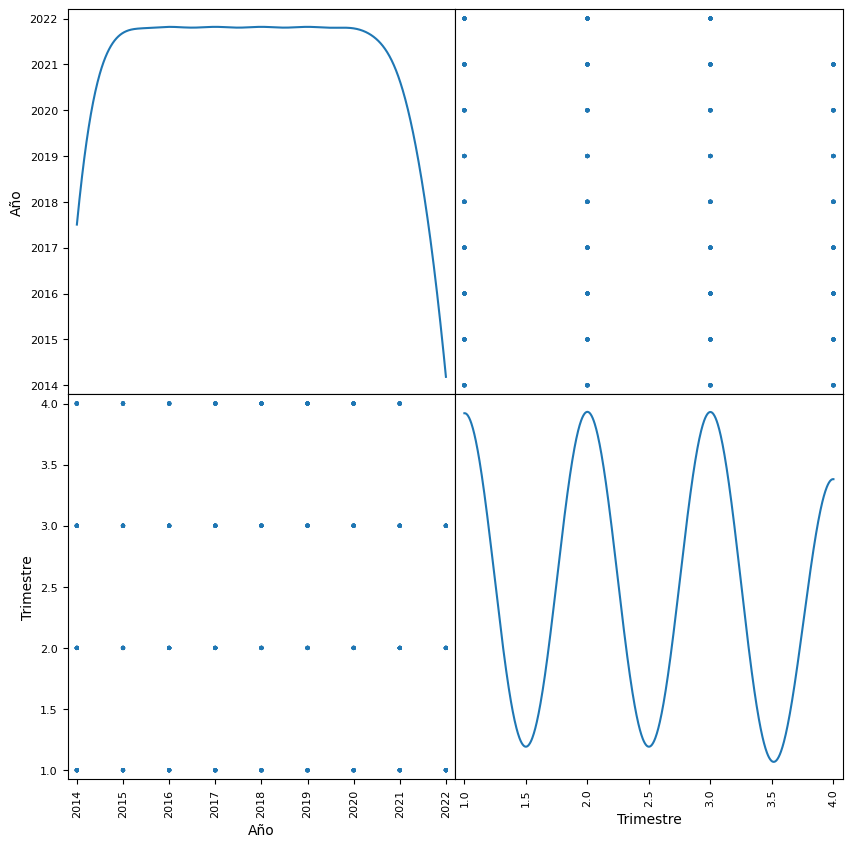

In [ ]:
# selecciono solo las columnas numéricas
df_numeric = df8.select_dtypes(include=['int64', 'float64'])
# crea una matriz de gráficos de dispersión
scatter_matrix(df_numeric, figsize=(10, 10), diagonal='kde')

# muestra el gráfico
plt.show()

In [ ]:
df10 = pd.read_excel('10.xlsx')

In [ ]:
# Imprime los tipos de datos de cada columna
print(df10.dtypes)
print(df10.info)

Año                      int64
Trimestre                int64
Provincia               object
HASTA 512 kbps           int64
+ 512 Kbps - 1 Mbps      int64
+ 1 Mbps - 6 Mbps        int64
+ 6 Mbps - 10 Mbps       int64
+ 10 Mbps - 20 Mbps      int64
+ 20 Mbps - 30 Mbps      int64
+ 30 Mbps                int64
OTROS                  float64
Total                    int64
dtype: object
<bound method DataFrame.info of       Año  Trimestre            Provincia  HASTA 512 kbps   
0    2022          3         Buenos Aires           29985  \
1    2022          3      Capital Federal             517   
2    2022          3            Catamarca              71   
3    2022          3                Chaco             461   
4    2022          3               Chubut             109   
..    ...        ...                  ...             ...   
835  2014          1           Santa Cruz             161   
836  2014          1             Santa Fe            8456   
837  2014          1  Santiago De

In [ ]:
df10.describe()

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
count,840.000000,840.000000,840.000000,840.000000,8.400000e+02,840.000000,840.000000,840.000000,8.400000e+02,834.000000,8.400000e+02
mean,2017.885714,2.457143,2086.426190,10142.846429,1.509700e+05,37396.558333,38292.270238,20988.008333,7.917956e+04,4968.657074,3.439888e+05
std,2.528745,1.105009,13615.218242,22262.822375,3.481538e+05,65406.204913,93996.489735,74792.113400,3.426234e+05,12217.734581,7.373366e+05
min,2014.000000,1.000000,6.000000,0.000000,2.842000e+03,0.000000,0.000000,0.000000,0.000000e+00,-1945.000000,1.240600e+04
25%,2016.000000,1.000000,36.750000,307.000000,2.853925e+04,2795.500000,1360.500000,22.750000,7.000000e+00,0.000000,5.232825e+04
50%,2018.000000,2.000000,110.000000,2730.500000,4.883450e+04,10014.000000,8553.500000,1016.500000,8.825000e+02,0.000000,1.043330e+05
75%,2020.000000,3.000000,568.000000,8130.250000,8.689750e+04,38534.500000,26268.500000,9429.000000,1.966075e+04,5015.250000,1.775798e+05
max,2022.000000,4.000000,238920.000000,171244.000000,2.299705e+06,403575.000000,886678.000000,949093.000000,3.618689e+06,120464.000000,4.721668e+06


En este caso solo seleccionare ["Año", "Trimestre", "Provincia", "Total"]

In [ ]:
df10 = df10[["Año", "Trimestre", "Provincia", "Total"]]
print(df10)


      Año  Trimestre            Provincia    Total
0    2022          3         Buenos Aires  4721668
1    2022          3      Capital Federal  1547679
2    2022          3            Catamarca    70293
3    2022          3                Chaco   144146
4    2022          3               Chubut   165778
..    ...        ...                  ...      ...
835  2014          1           Santa Cruz    26760
836  2014          1             Santa Fe   506013
837  2014          1  Santiago Del Estero    37113
838  2014          1     Tierra Del Fuego    31527
839  2014          1              Tucumán   130032

[840 rows x 4 columns]


Corregimos el tipo de dato en total

In [ ]:
df10['Total']  = df10['Total'] .astype(str).str.replace('.', ',')
df10['Total'] = df10['Total'].astype('Float64')
df10.rename(columns={'Total': 'total_internet_fijo_provincias'}, inplace=True)

df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Año                             840 non-null    int64  
 1   Trimestre                       840 non-null    int64  
 2   Provincia                       840 non-null    object 
 3   total_internet_fijo_provincias  840 non-null    Float64
dtypes: Float64(1), int64(2), object(1)
memory usage: 27.2+ KB


In [ ]:
df11 = pd.read_excel('11.xlsx')

In [ ]:
# Imprime los tipos de datos de cada columna
print(df11.dtypes)
print(df11.info)

Año           float64
Trimestre     float64
Provincia      object
Otros          object
0,256 Mbps     object
               ...   
80 Mbps        object
81 Mbps        object
83 Mbps        object
82 Mbps        object
86 Mbps        object
Length: 97, dtype: object
<bound method DataFrame.info of         Año  Trimestre            Provincia    Otros 0,256 Mbps 0,375 Mbps   
0    2022.0        3.0         Buenos Aires   65,821         19        - 0  \
1    2022.0        3.0      Capital Federal  105,477         31        - 0   
2    2022.0        3.0            Catamarca    2,208        - 0        - 0   
3    2022.0        3.0                Chaco    3,711        - 0        225   
4    2022.0        3.0               Chubut   20,024          8        - 0   
..      ...        ...                  ...      ...        ...        ...   
476  2017.0        4.0             Santa Fe   14,119        - 0        - 0   
477  2017.0        4.0  Santiago Del Estero      - 0        - 0        - 0  

In [ ]:
df11.describe()

,Año,Trimestre
count,480.000000,480.0000
mean,2019.750000,2.5000
std,1.480563,1.1192
min,2017.000000,1.0000
25%,2018.750000,1.7500
50%,2020.000000,2.5000
75%,2021.000000,3.2500
max,2022.000000,4.0000


Analizamos mas el detalle de los valores de cada columna

In [ ]:
datos_unicos(df11)

Valores únicos por columna 'Año': [2022. 2021. 2020. 2019. 2018. 2017.   nan]
Valores únicos por columna 'Trimestre': [ 3.  2.  1.  4. nan]
Valores únicos por columna 'Provincia': ['Buenos Aires' 'Capital Federal' 'Catamarca' 'Chaco' 'Chubut' 'Córdoba'
 'Corrientes' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa' 'La Rioja'
 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan' 'San Luis'
 'Santa Cruz' 'Santa Fe' 'Santiago Del Estero' 'Tierra Del Fuego'
 'Tucumán' nan]
Valores únicos por columna 'Otros': ['65,821' '105,477' '2,208' '3,711' '20,024' '13,873' '7,107' '16,759'
 '589' '- 0' '3,012' '4,771' '8,350' '14,858' '24,271' '6,491' '11,619'
 '14,815' '647' '20,209' '792' '3,351' '280' '65,849' '105,607' '2,207'
 '3,708' '20,021' '13,426' '590' '2,453' '3,940' '18,717' '24,270' '6,494'
 '11,617' '644' '17,584' '281' '26,280' '1,717' '7,580' '15,607' '13,104'
 '7,094' '16,750' '588' '2,442' '2,833' '3,287' '8,349' '7,885' '22,652'
 '6,489' '2,465' '28,589' '485' '18,444' '2,421' '2

Requieren transformaciones las columnas: Año, Trimestre, Otros, columnas con Mbps todos deben ser numericos

In [ ]:
df11["Año"] = pd.to_numeric(df11["Año"], errors='coerce').fillna(0).astype(int)
df11["Trimestre"] = pd.to_numeric(df11["Trimestre"], errors='coerce').fillna(0).astype(int)
print(df11.dtypes)

Año            int32
Trimestre      int32
Provincia     object
Otros         object
0,256 Mbps    object
               ...  
80 Mbps       object
81 Mbps       object
83 Mbps       object
82 Mbps       object
86 Mbps       object
Length: 97, dtype: object


Se pasan los tipos a int64 para unificar con los ya existentes

In [ ]:
df11["Año"] = df11["Año"].astype("int64")
df11["Trimestre"] = df11["Trimestre"].astype("int64")

In [ ]:
print(df11.columns)

Index(['Año', 'Trimestre', 'Provincia', 'Otros', '0,256 Mbps', '0,375 Mbps',
       '0,625 Mbps', '0,5 Mbps', '0,512 Mbps', '0,75 Mbps', '1 Mbps',
       '1,2 Mbps', '1,25 Mbps', '1,5 Mbps', '2 Mbps', '2,2 Mbps', '2,5 Mbps',
       '6,7 Mbps', '3 Mbps', '3,2 Mbps', '3,3 Mbps', '3,5 Mbps', '4 Mbps',
       '4,5 Mbps', '5 Mbps', '6 Mbps', '6,4 Mbps', '7 Mbps', '7,5 Mbps',
       '8 Mbps', '9 Mbps', '10 Mbps', '10,6 Mbps', '11 Mbps', '12 Mbps',
       '13 Mbps', '14 Mbps', '15 Mbps', '16 Mbps', '17 Mbps', '18 Mbps',
       '19 Mbps', '20 Mbps', '21 Mbps', '22 Mbps', '23 Mbps', '24 Mbps',
       '25 Mbps', '25,1 Mbps', '25,11 Mbps', '25,5 Mbps', '26 Mbps', '28 Mbps',
       '29 Mbps', '30 Mbps', '31 Mbps', '32 Mbps', '34 Mbps', '35 Mbps',
       '36 Mbps', '37 Mbps', '38 Mbps', '39 Mbps', '40 Mbps', '41 Mbps',
       '45 Mbps', '46 Mbps', '47 Mbps', '48 Mbps', '49 Mbps', '50 Mbps',
       '51 Mbps', '52 Mbps', '54 Mbps', '55 Mbps', '56 Mbps', '58 Mbps',
       '59 Mbps', '60 Mbps', '61 Mbp

In [ ]:
datos_unicos(df11)


Valores únicos por columna 'Año': [2022 2021 2020 2019 2018 2017    0]
Valores únicos por columna 'Trimestre': [3 2 1 4 0]
Valores únicos por columna 'Provincia': ['Buenos Aires' 'Capital Federal' 'Catamarca' 'Chaco' 'Chubut' 'Córdoba'
 'Corrientes' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa' 'La Rioja'
 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan' 'San Luis'
 'Santa Cruz' 'Santa Fe' 'Santiago Del Estero' 'Tierra Del Fuego'
 'Tucumán' nan]
Valores únicos por columna 'Otros': ['65,821' '105,477' '2,208' '3,711' '20,024' '13,873' '7,107' '16,759'
 '589' '- 0' '3,012' '4,771' '8,350' '14,858' '24,271' '6,491' '11,619'
 '14,815' '647' '20,209' '792' '3,351' '280' '65,849' '105,607' '2,207'
 '3,708' '20,021' '13,426' '590' '2,453' '3,940' '18,717' '24,270' '6,494'
 '11,617' '644' '17,584' '281' '26,280' '1,717' '7,580' '15,607' '13,104'
 '7,094' '16,750' '588' '2,442' '2,833' '3,287' '8,349' '7,885' '22,652'
 '6,489' '2,465' '28,589' '485' '18,444' '2,421' '273' '22,958' '2,2

In [ ]:
# Crear una lista con los nombres de las columnas que contienen valores numéricos
columnas_numericas = df11.select_dtypes(include='number').columns.tolist()
print(columnas_numericas)



['Año', 'Trimestre']


Esto me indica que se requieren transformaciones del resto de columnas, observo que tienen en su titulo la palabra Mbps, realizaré un filtro para ubicarlas.
tambien quito el string "- 0" a 0 y los nan por 0

In [ ]:
columnas_Mbps = [columna for columna in df11.columns if "Mbps" in columna]
df11[columnas_Mbps] = df11[columnas_Mbps].apply(pd.to_numeric, errors='coerce')

In [ ]:
df11[columnas_Mbps] = df11[columnas_Mbps].replace('- 0', '0')
df11['Otros'] = pd.to_numeric(df11['Otros'], errors='coerce')
df11 = df11.fillna(0)


In [ ]:
df11.info()
#datos_unicos(df11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 97 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Año         481 non-null    int64  
 1   Trimestre   481 non-null    int64  
 2   Provincia   481 non-null    object 
 3   Otros       481 non-null    float64
 4   0,256 Mbps  481 non-null    float64
 5   0,375 Mbps  481 non-null    float64
 6   0,625 Mbps  481 non-null    float64
 7   0,5 Mbps    481 non-null    float64
 8   0,512 Mbps  481 non-null    float64
 9   0,75 Mbps   481 non-null    float64
 10  1 Mbps      481 non-null    float64
 11  1,2 Mbps    481 non-null    float64
 12  1,25 Mbps   481 non-null    float64
 13  1,5 Mbps    481 non-null    float64
 14  2 Mbps      481 non-null    float64
 15  2,2 Mbps    481 non-null    float64
 16  2,5 Mbps    481 non-null    float64
 17  6,7 Mbps    481 non-null    float64
 18  3 Mbps      481 non-null    float64
 19  3,2 Mbps    481 non-null    f

In [ ]:
# Crear una columna nueva que sume todos los Mbps en una sola columna
df11.fillna(value=0, inplace=True)
columnas_Mbps = [col for col in df11.columns if 'Mbps' in col]
df11['Suma_Mb'] = df11[columnas_Mbps].sum(axis=1)
df11["Suma_Mb"] = df11["Suma_Mb"].astype(np.int64)
print(df11)

      Año  Trimestre            Provincia  Otros  0,256 Mbps  0,375 Mbps   
0    2022          3         Buenos Aires    0.0        19.0         0.0  \
1    2022          3      Capital Federal    0.0        31.0         0.0   
2    2022          3            Catamarca    0.0         0.0         0.0   
3    2022          3                Chaco    0.0         0.0       225.0   
4    2022          3               Chubut    0.0         8.0         0.0   
..    ...        ...                  ...    ...         ...         ...   
476  2017          4             Santa Fe    0.0         0.0         0.0   
477  2017          4  Santiago Del Estero    0.0         0.0         0.0   
478  2017          4     Tierra Del Fuego    0.0         0.0         0.0   
479  2017          4              Tucumán    0.0         0.0         0.0   
480     0          0                    0    0.0         0.0         0.0   

     0,625 Mbps  0,5 Mbps  0,512 Mbps  0,75 Mbps  ...  71 Mbps  75 Mbps   
0           

In [ ]:
df11['Count_Suma_Mb'] = df11.apply(lambda row: (row[columnas_Mbps] > 0).sum(), axis=1)
print(df11['Count_Suma_Mb'] )

0      30
1      17
2      10
3      14
4      10
       ..
476     7
477     7
478     6
479     5
480     0
Name: Count_Suma_Mb, Length: 481, dtype: int64


In [ ]:
columnas_numericas = df11.select_dtypes(include='number').columns.tolist()
print(columnas_numericas)

['Año', 'Trimestre', 'Otros', '0,256 Mbps', '0,375 Mbps', '0,625 Mbps', '0,5 Mbps', '0,512 Mbps', '0,75 Mbps', '1 Mbps', '1,2 Mbps', '1,25 Mbps', '1,5 Mbps', '2 Mbps', '2,2 Mbps', '2,5 Mbps', '6,7 Mbps', '3 Mbps', '3,2 Mbps', '3,3 Mbps', '3,5 Mbps', '4 Mbps', '4,5 Mbps', '5 Mbps', '6 Mbps', '6,4 Mbps', '7 Mbps', '7,5 Mbps', '8 Mbps', '9 Mbps', '10 Mbps', '10,6 Mbps', '11 Mbps', '12 Mbps', '13 Mbps', '14 Mbps', '15 Mbps', '16 Mbps', '17 Mbps', '18 Mbps', '19 Mbps', '20 Mbps', '21 Mbps', '22 Mbps', '23 Mbps', '24 Mbps', '25 Mbps', '25,1 Mbps', '25,11 Mbps', '25,5 Mbps', '26 Mbps', '28 Mbps', '29 Mbps', '30 Mbps', '31 Mbps', '32 Mbps', '34 Mbps', '35 Mbps', '36 Mbps', '37 Mbps', '38 Mbps', '39 Mbps', '40 Mbps', '41 Mbps', '45 Mbps', '46 Mbps', '47 Mbps', '48 Mbps', '49 Mbps', '50 Mbps', '51 Mbps', '52 Mbps', '54 Mbps', '55 Mbps', '56 Mbps', '58 Mbps', '59 Mbps', '60 Mbps', '61 Mbps', '62 Mbps', '63 Mbps', '64 Mbps', '65 Mbps', '66 Mbps', '67 Mbps', '68 Mbps', '70 Mbps', '71 Mbps', '75 Mbp

In [ ]:
datos_unicos(df11)

Valores únicos por columna 'Año': [2022 2021 2020 2019 2018 2017    0]
Valores únicos por columna 'Trimestre': [3 2 1 4 0]
Valores únicos por columna 'Provincia': ['Buenos Aires' 'Capital Federal' 'Catamarca' 'Chaco' 'Chubut' 'Córdoba'
 'Corrientes' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa' 'La Rioja'
 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan' 'San Luis'
 'Santa Cruz' 'Santa Fe' 'Santiago Del Estero' 'Tierra Del Fuego'
 'Tucumán' 0]
Valores únicos por columna 'Otros': [  0. 589. 647. 792. 280. 590. 644. 281. 588. 485. 273. 366. 491. 793.
 240.  50. 735. 898. 895. 164.  66.  19. 126.  44. 268. 758. 247.   2.
  45. 803. 833. 687. 493. 100. 243. 350. 645. 909. 540. 422. 698.   1.
 560. 923.   3. 606. 531. 326.  92. 546.   8.  38. 780. 112.  54. 258.
 775. 107.]
Valores únicos por columna '0,256 Mbps': [ 19.  31.   0.   8.   2.   1.   3.  32.  18.  17.  51.  30. 102.]
Valores únicos por columna '0,375 Mbps': [  0. 225.]
Valores únicos por columna '0,625 Mbps': [  0. 111

In [ ]:
# Eliminar las columnas que contienen 'Mbps' en su título
columnas_eliminar = [col for col in df11.columns if 'Mbps' in col]
df11 = df11.drop(columns=columnas_eliminar)

df11 = df11.drop(columns=['Otros'])

# Mostrar el dataframe resultante
print(df11.dtypes)


Año               int64
Trimestre         int64
Provincia        object
Suma_Mb           int64
Count_Suma_Mb     int64
dtype: object


In [ ]:
df11.head(5)

,Año,Trimestre,Provincia,Suma_Mb,Count_Suma_Mb
0,2022,3,Buenos Aires,3532,30
1,2022,3,Capital Federal,2032,17
2,2022,3,Catamarca,3118,10
3,2022,3,Chaco,3818,14
4,2022,3,Chubut,2902,10


In [ ]:
# Merge de los primeros dos dataframes
merged_df = pd.merge(df1, df4, on=["Año", "Trimestre", "Provincia"], how="outer")

# Merge del resultado anterior con el siguiente dataframe
merged_df = pd.merge(merged_df, df6, on=["Año", "Trimestre", "Provincia"], how="outer")

# Merge del resultado anterior con el siguiente dataframe
merged_df = pd.merge(merged_df, df8, on=["Año", "Trimestre", "Provincia"], how="outer")

# Merge del resultado anterior con el último dataframe
merged_df = pd.merge(merged_df, df10, on=["Año", "Trimestre", "Provincia"], how="outer")

# Merge del resultado anterior con el último dataframe
merged_df = pd.merge(merged_df, df11, on=["Año", "Trimestre", "Provincia"], how="outer")
# Convertir todas las cadenas de texto a minúsculas
merged_df = merged_df.applymap(lambda s: s.lower() if isinstance(s, str) else s)
merged_df.columns = merged_df.columns.str.lower()


Guardo el archivo resultante correspondiente a la unión de los archivos 1,4,6,8,10 y 11 correspondiente a la información de las Provincias

In [ ]:
merged_df.to_csv("datos_provincias.csv", index=False)


In [ ]:
merged_df.info()
merged_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   año                                    841 non-null    int64  
 1   trimestre                              841 non-null    int64  
 2   provincia                              841 non-null    object 
 3   accesos por cada 100 hogares           840 non-null    float64
 4   banda ancha fija                       840 non-null    float64
 5   dial up                                838 non-null    object 
 6   total                                  840 non-null    float64
 7   adsl                                   841 non-null    int64  
 8   cablemodem                             841 non-null    int64  
 9   fibra óptica                           841 non-null    int64  
 10  wireless                               841 non-null    int64  
 11  otros 

,año,trimestre,provincia,accesos por cada 100 hogares,banda ancha fija,dial up,total,adsl,cablemodem,fibra óptica,wireless,otros,total_fijo_xtipo_tecnologia_provincia,mbps (media de bajada),total_internet_fijo_provincias,suma_mb,count_suma_mb
0,2022,3,buenos aires,78.11,4715469.0,6199,4721668.0,339648,2748325,1436433,126846,70416,4721668.0,"70,19",4721668.0,3532.0,30.0
1,2022,3,capital federal,122.28,1545534.0,2145,1547679.0,140791,1240125,129218,5758,31787,1547679.0,"101,05",1547679.0,2032.0,17.0
2,2022,3,catamarca,65.33,70292.0,1,70293.0,10010,10495,46224,1329,2235,70293.0,"60,99",70293.0,3118.0,10.0


In [ ]:
print(merged_df.columns)


Index(['año', 'trimestre', 'provincia', 'accesos por cada 100 hogares',
       'banda ancha fija', 'dial up', 'total', 'adsl', 'cablemodem',
       'fibra óptica', 'wireless', 'otros',
       'total_fijo_xtipo_tecnologia_provincia', 'mbps (media de bajada)',
       'total_internet_fijo_provincias', 'suma_mb', 'count_suma_mb'],
      dtype='object')


In [ ]:
merged_df.describe()

,año,trimestre,accesos por cada 100 hogares,banda ancha fija,total,adsl,cablemodem,fibra óptica,wireless,otros,total_fijo_xtipo_tecnologia_provincia,suma_mb,count_suma_mb
count,841.000000,841.000000,840.000000,8.400000e+02,8.400000e+02,8.410000e+02,8.410000e+02,8.410000e+02,841.000000,841.000000,8.410000e+02,481.000000,481.000000
mean,2015.486326,2.454221,49.065750,3.447674e+05,3.457417e+05,1.274151e+05,1.715708e+05,2.987629e+04,10332.700357,6135.657551,3.453306e+05,1920.634096,11.074844
std,69.628146,1.107597,23.151885,7.400503e+05,7.419436e+05,2.549404e+05,4.219563e+05,1.234320e+05,18184.691493,10567.981259,7.415976e+05,1032.888242,4.508627
min,0.000000,0.000000,9.350000,1.219300e+04,1.255700e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,2016.000000,1.000000,32.107500,5.192225e+04,5.202975e+04,2.243800e+04,8.359000e+03,1.860000e+02,253.000000,305.000000,5.202900e+04,1161.000000,8.000000
50%,2018.000000,2.000000,45.900000,1.029360e+05,1.034895e+05,4.853900e+04,3.498400e+04,1.093000e+03,4259.000000,1852.000000,1.033990e+05,1912.000000,10.000000
75%,2020.000000,3.000000,61.865000,1.778685e+05,1.779148e+05,1.044890e+05,7.072000e+04,1.383200e+04,12425.000000,6896.000000,1.777620e+05,2601.000000,13.000000
max,2022.000000,4.000000,124.060000,4.715469e+06,4.721668e+06,1.586343e+06,2.748325e+06,1.436433e+06,126887.000000,73415.000000,4.721668e+06,5493.000000,30.000000


In [ ]:
# cantidad de duplicados
column_names=merged_df.columns
n_duplicates=merged_df.drop(labels=column_names,axis=1).duplicated().sum
n_duplicates

<bound method NDFrame._add_numeric_operations.<locals>.sum of Series([], dtype: bool)>

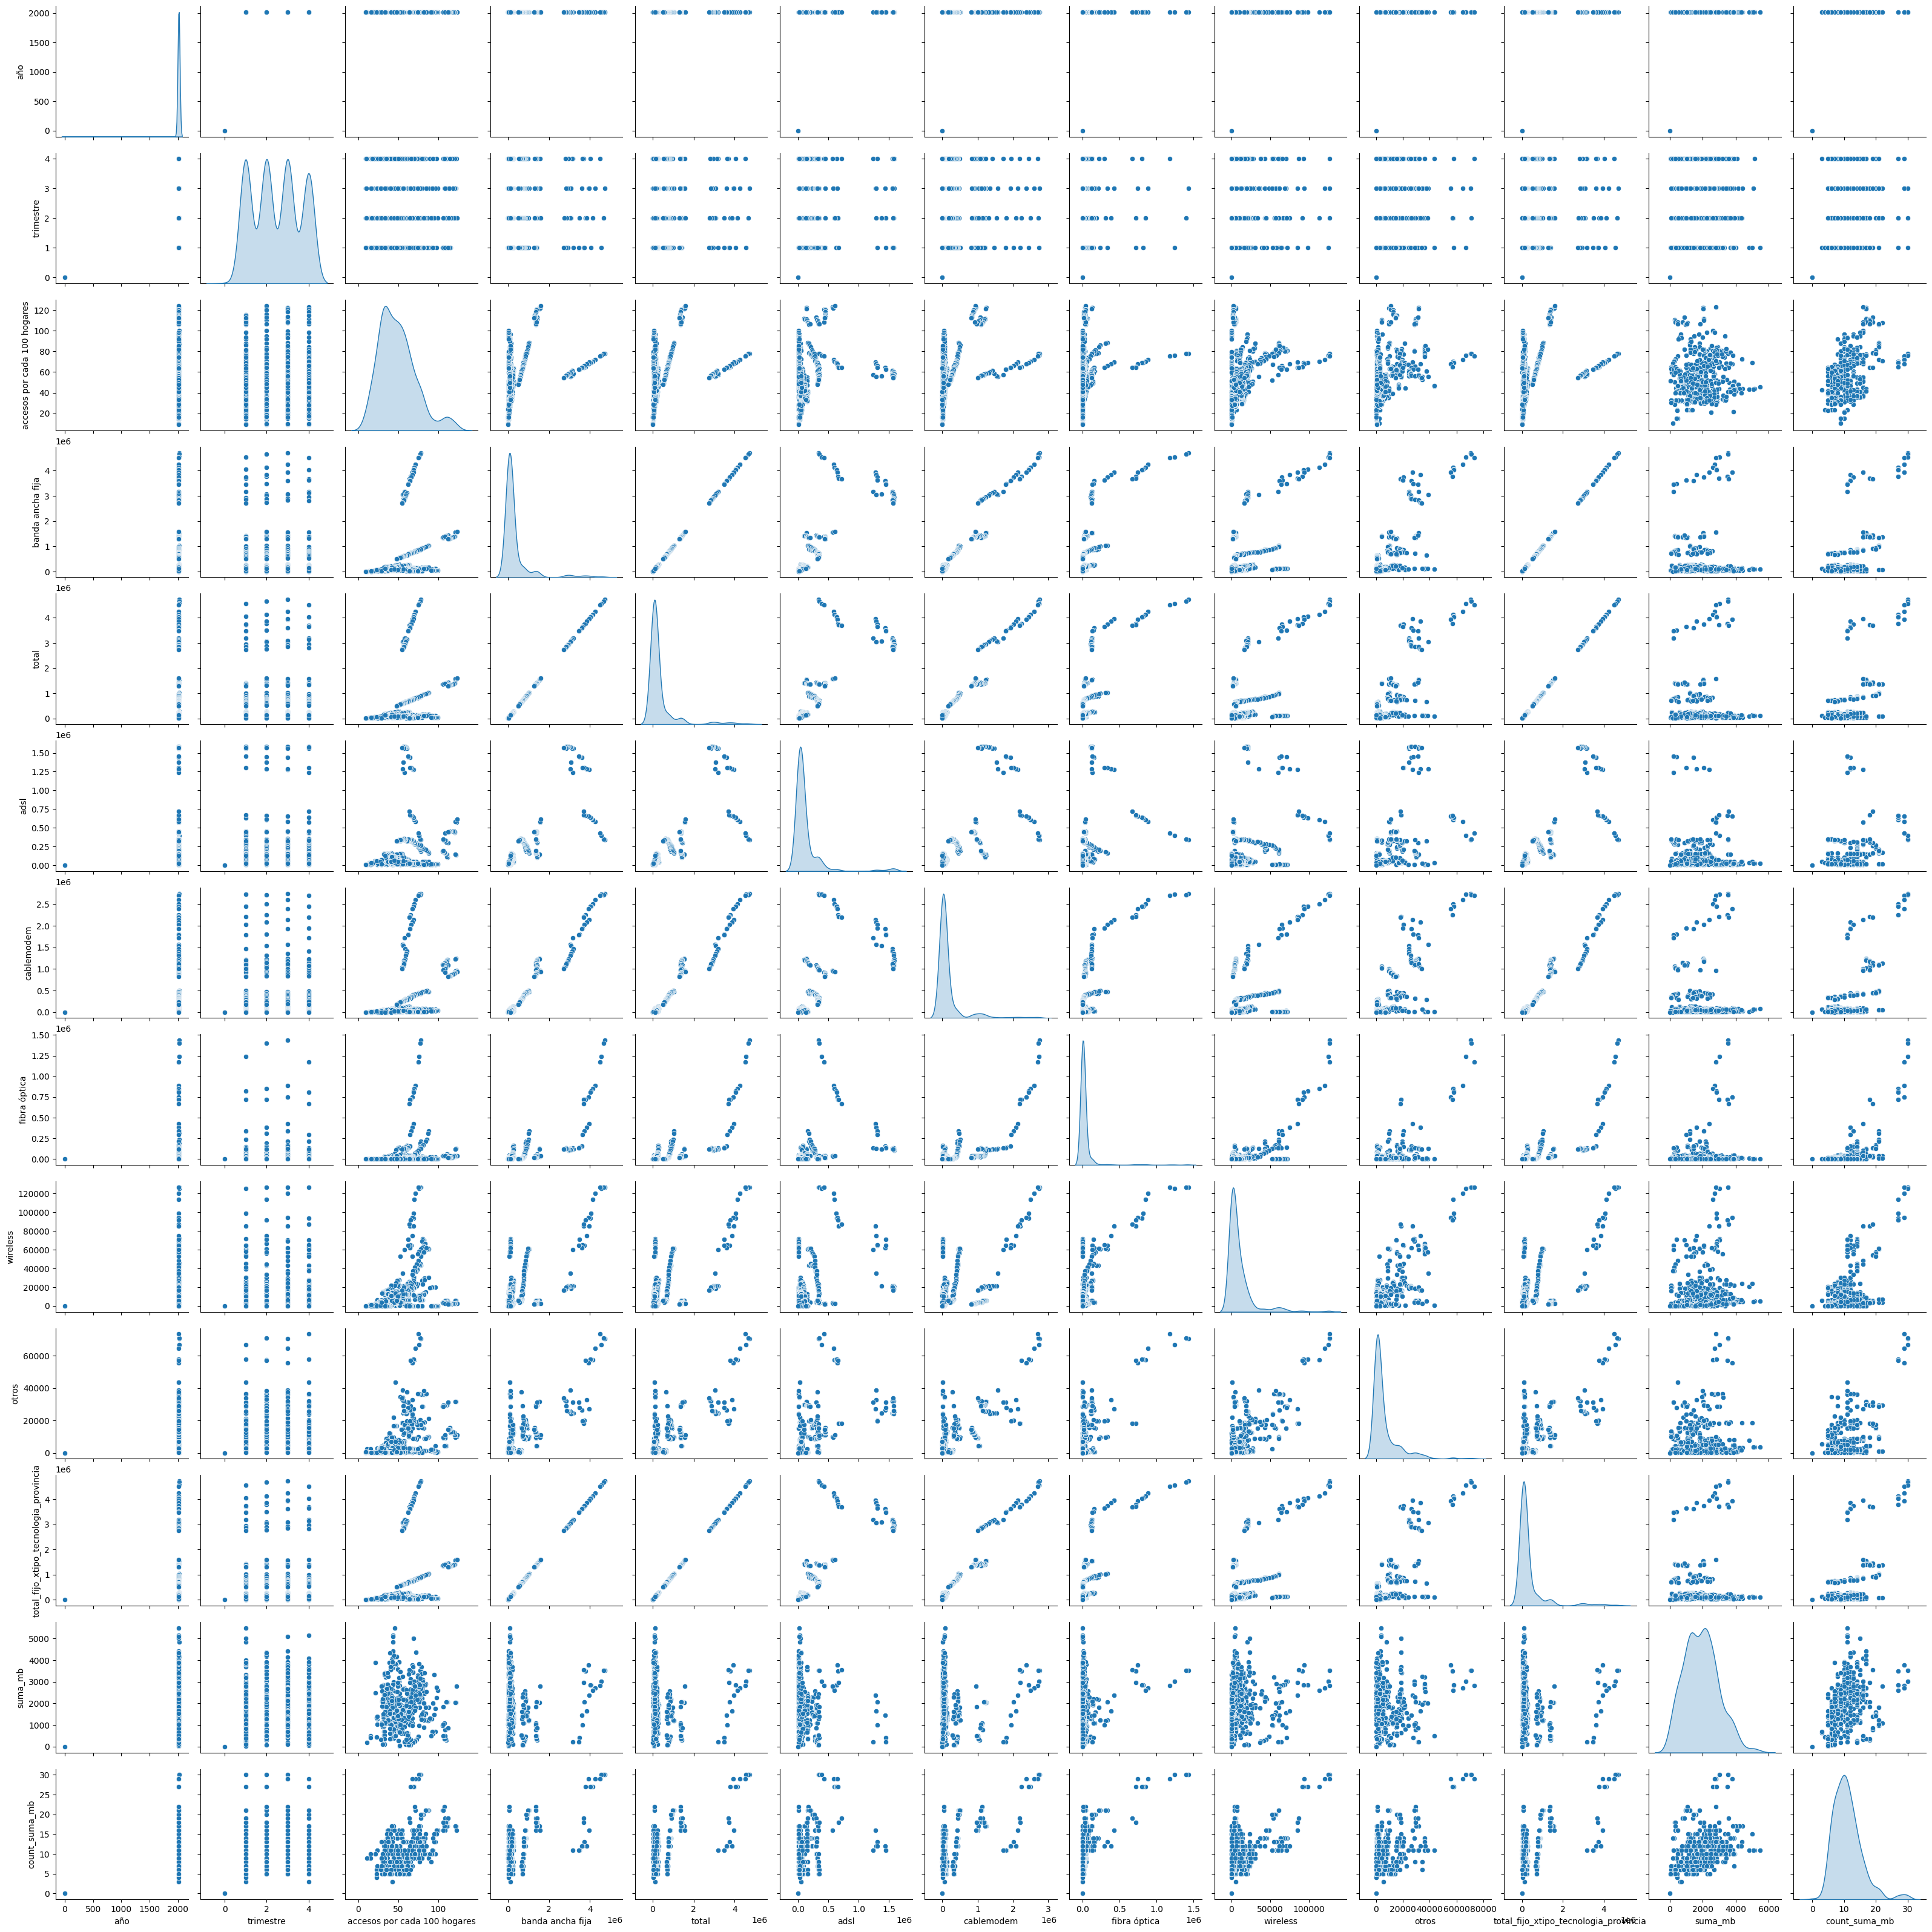

In [ ]:
df_numeric = merged_df.select_dtypes(include=['int64', 'float64'])
df_numeric = df_numeric.apply(pd.to_numeric)
sns.pairplot(df_numeric, diag_kind='kde')
plt.show()

<Axes: title={'center': 'Porcentaje de valores faltantes por columna'}, ylabel='Relación de valores perdidos por columna'>

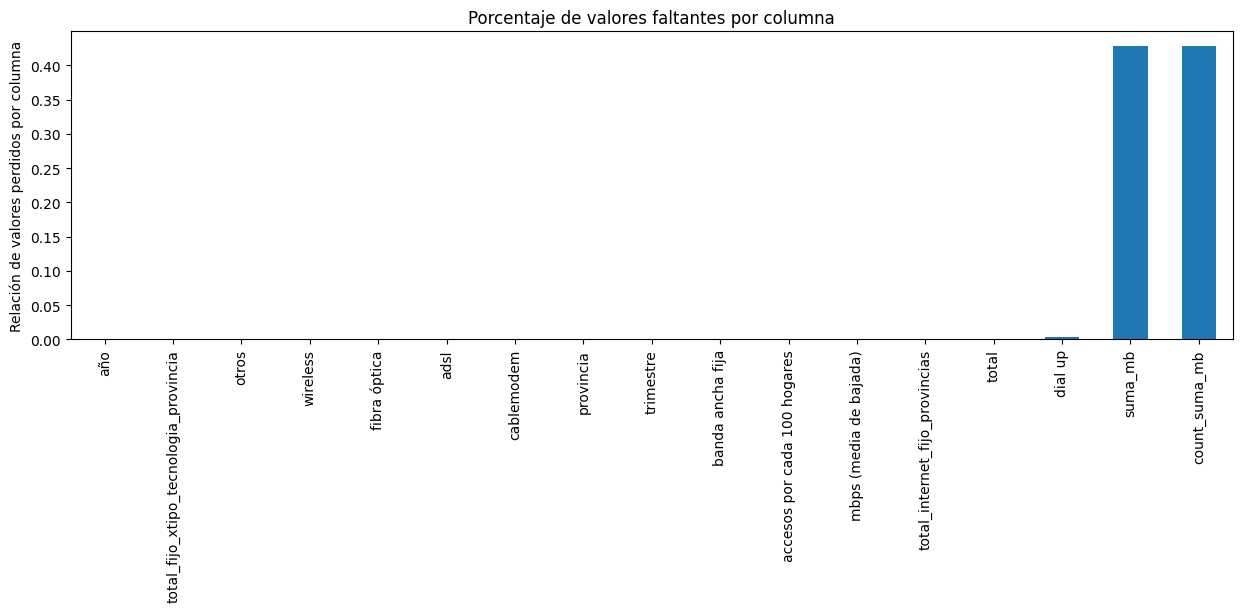

In [ ]:
#Valores faltantes por columna
merged_df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15,4),
    title="Porcentaje de valores faltantes por columna",
    ylabel="Relación de valores perdidos por columna")


Conclusión sobre la primera base de datos por Provincia:
se tienen 841 registros, de los cuales en el campo suma_mb y count_suma_mb solo hay 481 registros, debido a que no en todas las columnas hay datos pues no todos los clientes toman todos los servicios.
No posee filas duplicadas
Los datos vacios se llenan con cero (0)

Procedo a realizar el analisis de los datos de archivos con similitud en los campos de Año, Trimestre y periodo. este sera el  Dataset 2 Nacionales  de los archivos numero: 2,3,5,7,9,12

In [ ]:
# Imprime los tipos de datos de cada columna
print(df2.dtypes)
print(df2.info)

Año                               int64
Trimestre                         int64
Accesos por cada 100 hogares    float64
Accesos por cada 100 hab        float64
Periodo                          object
dtype: object
<bound method DataFrame.info of      Año  Trimestre  Accesos por cada 100 hogares  Accesos por cada 100 hab   
0   2022          3                         76.64                     23.95  \
1   2022          2                         75.97                     23.72   
2   2022          1                         73.88                     23.05   
3   2021          4                         73.18                     22.81   
4   2021          3                         70.58                     21.98   
5   2021          2                         69.24                     21.55   
6   2021          1                         67.95                     21.13   
7   2020          4                         67.62                     21.01   
8   2020          3                        

In [ ]:
df2.describe()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab
count,35.000000,35.000000,35.000000,35.000000
mean,2017.885714,2.457143,60.275429,18.606286
std,2.564135,1.120474,8.148909,2.662968
min,2014.000000,1.000000,49.550000,15.050000
25%,2016.000000,1.500000,52.985000,16.245000
50%,2018.000000,2.000000,59.160000,18.240000
75%,2020.000000,3.000000,66.050000,20.475000
max,2022.000000,4.000000,76.640000,23.950000


In [ ]:
datos_unicos(df2)

Valores únicos por columna 'Año': [2022 2021 2020 2019 2018 2017 2016 2015 2014]
Valores únicos por columna 'Trimestre': [3 2 1 4]
Valores únicos por columna 'Accesos por cada 100 hogares': [76.64 75.97 73.88 73.18 70.58 69.24 67.95 67.62 66.31 64.21 62.86 62.92
 65.79 64.53 62.48 61.42 60.69 59.16 58.82 57.78 56.9  54.9  54.16 53.94
 53.73 53.34 51.85 52.63 52.46 51.76 51.36 50.5  50.67 49.86 49.55]
Valores únicos por columna 'Accesos por cada 100 hab': [23.95 23.72 23.05 22.81 21.98 21.55 21.13 21.01 20.59 19.92 19.48 19.49
 20.36 19.96 19.31 18.97 18.73 18.24 18.12 17.79 17.51 16.88 16.64 16.56
 16.5  16.37 15.9  16.12 16.05 15.82 15.68 15.39 15.43 15.16 15.05]
Valores únicos por columna 'Periodo': ['Jul-Sept 2022' 'Abr-Jun 2022' 'Ene-Mar 2022' 'Oct-Dic 2021'
 'Jul-Sept 2021' 'Abr-Jun 2021' 'Ene-Mar 2021' 'Oct-Dic 2020'
 'Jul-Sept 2020' 'Abr-Jun 2020' 'Ene-Mar 2020' 'Oct-Dic 2019'
 'Jul-Sept 2019' 'Abr-Jun 2019' 'Ene-Mar 2019' 'Oct-Dic 2018'
 'Jul-Sept 2018' 'Abr-Jun 2018' 'Ene-Mar 

In [ ]:
# Imprime los tipos de datos de cada columna
print(df3.dtypes)
print(df3.head(3))

Año                  int64
Trimestre            int64
Banda ancha fija     int64
Dial up              int64
Total                int64
Periodo             object
dtype: object
    Año  Trimestre  Banda ancha fija  Dial up     Total        Periodo
0  2022          3          11078691    12437  11091128  Jul-Sept 2022
1  2022          2          10946248    12436  10958684   Abr-Jun 2022
2  2022          1          10611390    12619  10624009   Ene-Mar 2022


In [ ]:
df3.describe()

,Año,Trimestre,Banda ancha fija,Dial up,Total
count,35.000000,35.000000,3.500000e+01,35.000000,3.500000e+01
mean,2017.885714,2.457143,8.274417e+06,23383.371429,8.297800e+06
std,2.564135,1.120474,1.408774e+06,10087.397193,1.399611e+06
min,2014.000000,1.000000,6.362108e+06,9991.000000,6.398398e+06
25%,2016.000000,1.500000,7.024946e+06,12436.500000,7.057455e+06
50%,2018.000000,2.000000,8.083533e+06,26911.000000,8.110444e+06
75%,2020.000000,3.000000,9.244537e+06,32508.500000,9.260442e+06
max,2022.000000,4.000000,1.107869e+07,39324.000000,1.109113e+07


In [ ]:
# la columna con nombre total es muy ambigua, la cambiare para identificarla mejor
df3 = df3.rename(columns={"Total": "Total_banda_ancha"})

In [ ]:
datos_unicos(df3)

Valores únicos por columna 'Año': [2022 2021 2020 2019 2018 2017 2016 2015 2014]
Valores únicos por columna 'Trimestre': [3 2 1 4]
Valores únicos por columna 'Banda ancha fija': [11078691 10946248 10611390 10476933 10075184  9852702  9637956  9561546
  9346183  9021040  8802435  8783053  9142891  8938427  8626323  8451841
  8320223  8083533  8009981  7842778  7696594  7401134  7277314  7223128
  7178340  7097604  6874704  6952289  6902267  6783279  6699714  6559172
  6559264  6428329  6362108]
Valores únicos por columna 'Dial up': [12437 12436 12619 12861 10357 10382 10016  9991 10128 21793 21754 21812
 21814 26812 26911 27072 27444 28349 28530 28540 28545 28610 32475 32652
 32542 32801 32909 38018 39324 36007 36139 36290]
Valores únicos por columna 'Total_banda_ancha': [11091128 10958684 10624009 10489794 10085541  9863084  9647972  9571562
  9356199  9031056  8812426  8793181  9164684  8960181  8648135  8473655
  8347035  8110444  8037053  7870222  7724943  7429664  7305854  7251673


In [ ]:
# Imprime los tipos de datos de cada columna
print(df5.dtypes)
print(df5.info)

Año              int64
Trimestre        int64
ADSL             int64
Cablemodem       int64
Fibra óptica     int64
Wireless         int64
Otros            int64
Total            int64
Periodo         object
dtype: object
<bound method DataFrame.info of      Año  Trimestre     ADSL  Cablemodem  Fibra óptica  Wireless   Otros   
0   2022          3  1395277     6031970       2871541    557110  235230  \
1   2022          2  1468333     5979214       2723285    556243  231609   
2   2022          1  1533240     6073426       2219533    545814  251996   
3   2021          4  1657615     5984240       2072236    523107  252596   
4   2021          3  1950631     5826257       1566048    492415  250190   
5   2021          2  2018587     5641731       1472246    476968  253552   
6   2021          1  2175211     5424782       1362976    434548  250455   
7   2020          4  2213949     5371824       1311199    421554  253036   
8   2020          3  2263889     5259351       1170879    41325

In [ ]:
df5.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,35.000000,35.000000,3.500000e+01,3.500000e+01,3.500000e+01,35.000000,35.000000,3.500000e+01
mean,2017.885714,2.457143,3.040425e+06,4.122601e+06,7.390627e+05,248280.028571,147431.085714,8.297800e+06
std,2.564135,1.120474,8.354122e+05,1.225277e+06,7.861772e+05,174354.292929,85868.716764,1.399611e+06
min,2014.000000,1.000000,1.395277e+06,2.407330e+06,1.391870e+05,70749.000000,54300.000000,6.398398e+06
25%,2016.000000,1.500000,2.279711e+06,2.966749e+06,1.679880e+05,85107.500000,62763.500000,7.057455e+06
50%,2018.000000,2.000000,3.557216e+06,4.038141e+06,2.262850e+05,194267.000000,100554.000000,8.110444e+06
75%,2020.000000,3.000000,3.723156e+06,5.132233e+06,1.138802e+06,394963.000000,247918.500000,9.260442e+06
max,2022.000000,4.000000,3.803024e+06,6.073426e+06,2.871541e+06,557110.000000,265328.000000,1.109113e+07


In [ ]:
# el titulo total es ambiguo, lo cambio por Total_internetxTipo
df5 = df5.rename(columns={"Total": "Total_internetxTipo"})

df5 = df5.rename(columns={"Otros": "Otros_tipos"})

In [ ]:
datos_unicos(df5)

Valores únicos por columna 'Año': [2022 2021 2020 2019 2018 2017 2016 2015 2014]
Valores únicos por columna 'Trimestre': [3 2 1 4]
Valores únicos por columna 'ADSL': [1395277 1468333 1533240 1657615 1950631 2018587 2175211 2213949 2263889
 2295533 2299457 2414575 2909805 2990457 3132789 3329027 3521447 3557216
 3574294 3584311 3622575 3723518 3708898 3722794 3776442 3782085 3792493
 3803024 3788696 3767821 3756153 3764038 3714764 3708882 3697066]
Valores únicos por columna 'Cablemodem': [6031970 5979214 6073426 5984240 5826257 5641731 5424782 5371824 5259351
 5005115 4903674 4883869 4800091 4635575 4435439 4313831 4238171 4038141
 3981129 3818157 3670221 3383434 3276251 3210602 3124855 3035272 2806359
 2898226 2840203 2756294 2668248 2536219 2569868 2461670 2407330]
Valores únicos por columna 'Fibra óptica': [2871541 2723285 2219533 2072236 1566048 1472246 1362976 1311199 1170879
 1106725 1047817  941295  852221  760794  637099  388013  247366  226285
  217460  211425  193964  180777  

In [ ]:
# Imprime los tipos de datos de cada columna
print(df7.dtypes)
print(df7.info)

Año                         int64
Trimestre                   int64
Mbps (Media de bajada)    float64
Trimestre.1                object
dtype: object
<bound method DataFrame.info of      Año  Trimestre  Mbps (Media de bajada)    Trimestre.1
0   2022          3                   62.46  Jul-Sept 2022
1   2022          2                   58.44   Abr-Jun 2022
2   2022          1                   55.11   Ene-Mar 2022
3   2021          4                   52.34   Oct-Dic 2021
4   2021          3                   48.46  Jul-Sept 2021
5   2021          2                   45.63   Abr-Jun 2021
6   2021          1                   43.11   Ene-Mar 2021
7   2020          4                   42.36   Oct-Dic 2020
8   2020          3                   40.67  Jul-Sept 2020
9   2020          2                   38.32   Abr-Jun 2020
10  2020          1                   37.52   Ene-Mar 2020
11  2019          4                   28.26   Oct-Dic 2019
12  2019          3                   24.18  Jul-Se

In [ ]:
# la columna con nombre Trimestre realmente es el periodo
df7 = df7.rename(columns={"Trimestre.1": "Periodo"})

In [ ]:
df7.describe()

,Año,Trimestre,Mbps (Media de bajada)
count,35.000000,35.000000,35.000000
mean,2017.885714,2.457143,21.827143
std,2.564135,1.120474,19.230717
min,2014.000000,1.000000,3.620000
25%,2016.000000,1.500000,5.250000
50%,2018.000000,2.000000,13.850000
75%,2020.000000,3.000000,39.495000
max,2022.000000,4.000000,62.460000


In [ ]:
datos_unicos(df7)

Valores únicos por columna 'Año': [2022 2021 2020 2019 2018 2017 2016 2015 2014]
Valores únicos por columna 'Trimestre': [3 2 1 4]
Valores únicos por columna 'Mbps (Media de bajada)': [62.46 58.44 55.11 52.34 48.46 45.63 43.11 42.36 40.67 38.32 37.52 28.26
 24.18 20.33 17.38 15.95 15.36 13.85 13.22 12.01  8.34  7.16  6.62  6.34
  5.94  5.42  5.08  4.99  4.79  4.55  4.35  4.16  3.87  3.76  3.62]
Valores únicos por columna 'Periodo': ['Jul-Sept 2022' 'Abr-Jun 2022' 'Ene-Mar 2022' 'Oct-Dic 2021'
 'Jul-Sept 2021' 'Abr-Jun 2021' 'Ene-Mar 2021' 'Oct-Dic 2020'
 'Jul-Sept 2020' 'Abr-Jun 2020' 'Ene-Mar 2020' 'Oct-Dic 2019'
 'Jul-Sept 2019' 'Abr-Jun 2019' 'Ene-Mar 2019' 'Oct-Dic 2018'
 'Jul-Sept 2018' 'Abr-Jun 2018' 'Ene-Mar 2018' 'Oct-Dic 2017'
 'Jul-Sept 2017' 'Abr-Jun 2017' 'Ene-Mar 2017' 'Oct-Dic 2016'
 'Jul-Sept 2016' 'Abr-Jun 2016' 'Ene-Mar 2016' 'Oct-Dic 2015'
 'Jul-Sept 2015' 'Abr-Jun 2015' 'Ene-Mar 2015' 'Oct-Dic 2014'
 'Jul-Sept 2014' 'Abr-Jun 2014' 'Ene-Mar 2014']


In [ ]:
# Imprime los tipos de datos de cada columna
print(df9.dtypes)
print(df9.info)

Año                        int64
Trimestre                  int64
Hasta 512 kbps             int64
Entre 512 Kbps y 1 Mbps    int64
Entre 1 Mbps y 6 Mbps      int64
Entre 6 Mbps y 10 Mbps     int64
Entre 10 Mbps y 20 Mbps    int64
Entre 20 Mbps y 30 Mbps    int64
Más de 30 Mbps             int64
OTROS                      int64
Total                      int64
dtype: object
<bound method DataFrame.info of      Año  Trimestre  Hasta 512 kbps  Entre 512 Kbps y 1 Mbps   
0   2022          3           33013                    96727  \
1   2022          2           33667                    99498   
2   2022          1           34890                   104840   
3   2021          4           41262                    28521   
4   2021          3           40174                    41437   
5   2021          2           40172                    42024   
6   2021          1           39487                    41674   
7   2020          4           39510                    42185   
8   2020       

In [ ]:
df9.describe()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
count,35.000000,35.000000,35.000000,35.000000,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,35.00000,3.500000e+01
mean,2017.885714,2.457143,50074.228571,243428.314286,3.623279e+06,8.975174e+05,9.190145e+05,5.037122e+05,1.900309e+06,118396.00000,8.255731e+06
std,2.564135,1.120474,53083.966405,199321.891143,1.292407e+06,2.462911e+05,4.881587e+05,4.717638e+05,2.357935e+06,112930.69412,1.442421e+06
min,2014.000000,1.000000,5675.000000,28521.000000,1.161370e+06,2.891820e+05,1.011270e+05,3.450000e+02,1.159500e+04,0.00000,6.272846e+06
25%,2016.000000,1.500000,26397.000000,68384.500000,2.643902e+06,7.799985e+05,6.674615e+05,5.082050e+04,2.620000e+04,0.00000,7.029346e+06
50%,2018.000000,2.000000,39487.000000,217997.000000,3.428759e+06,9.769560e+05,8.144700e+05,5.098300e+05,4.443910e+05,155145.00000,8.110444e+06
75%,2020.000000,3.000000,41210.000000,394515.500000,4.996999e+06,1.057958e+06,1.149810e+06,6.396735e+05,3.882480e+06,196292.00000,9.260442e+06
max,2022.000000,4.000000,241713.000000,687619.000000,5.153437e+06,1.245333e+06,2.068087e+06,1.688748e+06,6.995750e+06,351594.00000,1.109113e+07


In [ ]:
# la columna con nombre total es muy ambigua, la cambiare para identificarla mejor
df9 = df9.rename(columns={"Total": "Total_internet_fijo"})

df9 = df9.rename(columns={"OTROS": "Otros_internet_fijo"})

In [ ]:
datos_unicos(df9)

Valores únicos por columna 'Año': [2022 2021 2020 2019 2018 2017 2016 2015 2014]
Valores únicos por columna 'Trimestre': [3 2 1 4]
Valores únicos por columna 'Hasta 512 kbps': [ 33013  33667  34890  41262  40174  40172  39487  39510  41038  42550
  38272 241713 202790 166573 138740   5675   5972   7309  15041  19022
  22366  20653  20724  20104  44008  30428  34243  35030  40723  41158
  44075  37430  41064  52684]
Valores únicos por columna 'Entre 512 Kbps y 1 Mbps': [ 96727  99498 104840  28521  41437  42024  41674  42185  44005  48690
  56170  28980  80599  95980 195706 201196 220589 219467 215406 221474
 217997 222766 230159 233398 294413 384221 404810 427394 455777 500175
 516919 554749 608018 656408 687619]
Valores únicos por columna 'Entre 1 Mbps y 6 Mbps': [1161370 1193090 1263273 1413208 2550229 2531271 2593477 2622638 2637984
 2651502 2649819 2792307 3309137 3444458 3428759 3337982 3401277 3316868
 3272724 3773159 4062226 4416065 4584534 4673339 4816081 5058481 4944358
 50496

In [ ]:
columnas_numericas = df9.select_dtypes(include='number').columns.tolist()
print(columnas_numericas)

['Año', 'Trimestre', 'Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps', 'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps', 'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps', 'Otros_internet_fijo', 'Total_internet_fijo']


In [ ]:
# Imprime los tipos de datos de cada columna
print(df12.dtypes)
print(df12.info)

Año                           int64
Trimestre                     int64
Ingresos (miles de pesos)     int64
Periodo                      object
dtype: object
<bound method DataFrame.info of      Año  Trimestre  Ingresos (miles de pesos)        Periodo
0   2022          3                   67055930  Jul-Sept 2022
1   2022          2                   60335724   Abr-Jun 2022
2   2022          1                   55589997   Ene-Mar 2022
3   2021          4                   45467887   Oct-Dic 2021
4   2021          3                   42999944  Jul-Sept 2021
5   2021          2                   38239667   Abr-Jun 2021
6   2021          1                   36676371   Ene-Mar 2021
7   2020          4                   33539703   Oct-Dic 2020
8   2020          3                   31997445  Jul-Sept 2020
9   2020          2                   32102476   Abr-Jun 2020
10  2020          1                   29946216   Ene-Mar 2020
11  2019          4                   24169251   Oct-Dic 2019
12  

In [ ]:
df12.describe()

,Año,Trimestre,Ingresos (miles de pesos)
count,35.000000,35.000000,3.500000e+01
mean,2017.885714,2.457143,2.058845e+07
std,2.564135,1.120474,1.774214e+07
min,2014.000000,1.000000,2.984054e+06
25%,2016.000000,1.500000,6.235543e+06
50%,2018.000000,2.000000,1.431947e+07
75%,2020.000000,3.000000,3.204996e+07
max,2022.000000,4.000000,6.705593e+07


Procedo a unir los Archivos información Nacional, archivos 2,3,5,7,9,12. Lo hare de dos en dos considerando que df9 no tiene periodo pero si Año y Trimestre. Tambien se pone todo en minusculas.

In [ ]:

# Merge de los primeros dos dataframes
merged_df_nacional = pd.merge(df2, df3, on=["Año", "Trimestre", "Periodo"], how="outer")

# Merge del resultado anterior con el siguiente dataframe
merged_df_nacional = pd.merge(merged_df_nacional, df5, on=["Año", "Trimestre","Periodo"], how="outer")

# Merge del resultado anterior con el siguiente dataframe
merged_df_nacional = pd.merge(merged_df_nacional, df7, on=["Año", "Trimestre", "Periodo"], how="outer")

# Merge del resultado anterior con el último dataframe
merged_df_nacional = pd.merge(merged_df_nacional, df12, on=["Año", "Trimestre", "Periodo"], how="outer")

# Merge del resultado anterior con el último dataframe
merged_df_nacional = pd.merge(merged_df_nacional, df9, on=["Año", "Trimestre"], how="outer")

# Convertir los títulos de las columnas a minúsculas
merged_df_nacional.columns = merged_df_nacional.columns.str.lower()

# Convertir todas las cadenas de texto a minúsculas
merged_df_nacional = merged_df_nacional.applymap(lambda s: s.lower() if isinstance(s, str) else s)
merged_df_nacional.columns = merged_df_nacional.columns.str.lower()


In [ ]:
merged_df_nacional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   año                           35 non-null     int64  
 1   trimestre                     35 non-null     int64  
 2   accesos por cada 100 hogares  35 non-null     float64
 3   accesos por cada 100 hab      35 non-null     float64
 4   periodo                       35 non-null     object 
 5   banda ancha fija              35 non-null     int64  
 6   dial up                       35 non-null     int64  
 7   total_banda_ancha             35 non-null     int64  
 8   adsl                          35 non-null     int64  
 9   cablemodem                    35 non-null     int64  
 10  fibra óptica                  35 non-null     int64  
 11  wireless                      35 non-null     int64  
 12  otros_tipos                   35 non-null     int64  
 13  total_i

In [ ]:
# cantidad de duplicados
column_names=merged_df_nacional.columns
n_duplicates=merged_df_nacional.drop(labels=column_names,axis=1).duplicated().sum
n_duplicates

<bound method NDFrame._add_numeric_operations.<locals>.sum of Series([], dtype: bool)>

In [ ]:
merged_df_nacional.describe()

,año,trimestre,accesos por cada 100 hogares,accesos por cada 100 hab,banda ancha fija,dial up,total_banda_ancha,adsl,cablemodem,fibra óptica,...,ingresos (miles de pesos),hasta 512 kbps,entre 512 kbps y 1 mbps,entre 1 mbps y 6 mbps,entre 6 mbps y 10 mbps,entre 10 mbps y 20 mbps,entre 20 mbps y 30 mbps,más de 30 mbps,otros_internet_fijo,total_internet_fijo
count,35.000000,35.000000,35.000000,35.000000,3.500000e+01,35.000000,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,...,3.500000e+01,35.000000,35.000000,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,35.00000,3.500000e+01
mean,2017.885714,2.457143,60.275429,18.606286,8.274417e+06,23383.371429,8.297800e+06,3.040425e+06,4.122601e+06,7.390627e+05,...,2.058845e+07,50074.228571,243428.314286,3.623279e+06,8.975174e+05,9.190145e+05,5.037122e+05,1.900309e+06,118396.00000,8.255731e+06
std,2.564135,1.120474,8.148909,2.662968,1.408774e+06,10087.397193,1.399611e+06,8.354122e+05,1.225277e+06,7.861772e+05,...,1.774214e+07,53083.966405,199321.891143,1.292407e+06,2.462911e+05,4.881587e+05,4.717638e+05,2.357935e+06,112930.69412,1.442421e+06
min,2014.000000,1.000000,49.550000,15.050000,6.362108e+06,9991.000000,6.398398e+06,1.395277e+06,2.407330e+06,1.391870e+05,...,2.984054e+06,5675.000000,28521.000000,1.161370e+06,2.891820e+05,1.011270e+05,3.450000e+02,1.159500e+04,0.00000,6.272846e+06
25%,2016.000000,1.500000,52.985000,16.245000,7.024946e+06,12436.500000,7.057455e+06,2.279711e+06,2.966749e+06,1.679880e+05,...,6.235543e+06,26397.000000,68384.500000,2.643902e+06,7.799985e+05,6.674615e+05,5.082050e+04,2.620000e+04,0.00000,7.029346e+06
50%,2018.000000,2.000000,59.160000,18.240000,8.083533e+06,26911.000000,8.110444e+06,3.557216e+06,4.038141e+06,2.262850e+05,...,1.431947e+07,39487.000000,217997.000000,3.428759e+06,9.769560e+05,8.144700e+05,5.098300e+05,4.443910e+05,155145.00000,8.110444e+06
75%,2020.000000,3.000000,66.050000,20.475000,9.244537e+06,32508.500000,9.260442e+06,3.723156e+06,5.132233e+06,1.138802e+06,...,3.204996e+07,41210.000000,394515.500000,4.996999e+06,1.057958e+06,1.149810e+06,6.396735e+05,3.882480e+06,196292.00000,9.260442e+06
max,2022.000000,4.000000,76.640000,23.950000,1.107869e+07,39324.000000,1.109113e+07,3.803024e+06,6.073426e+06,2.871541e+06,...,6.705593e+07,241713.000000,687619.000000,5.153437e+06,1.245333e+06,2.068087e+06,1.688748e+06,6.995750e+06,351594.00000,1.109113e+07


<Axes: title={'center': 'Porcentaje de valores faltantes por columna'}, ylabel='Relación de valores perdidos por columna'>

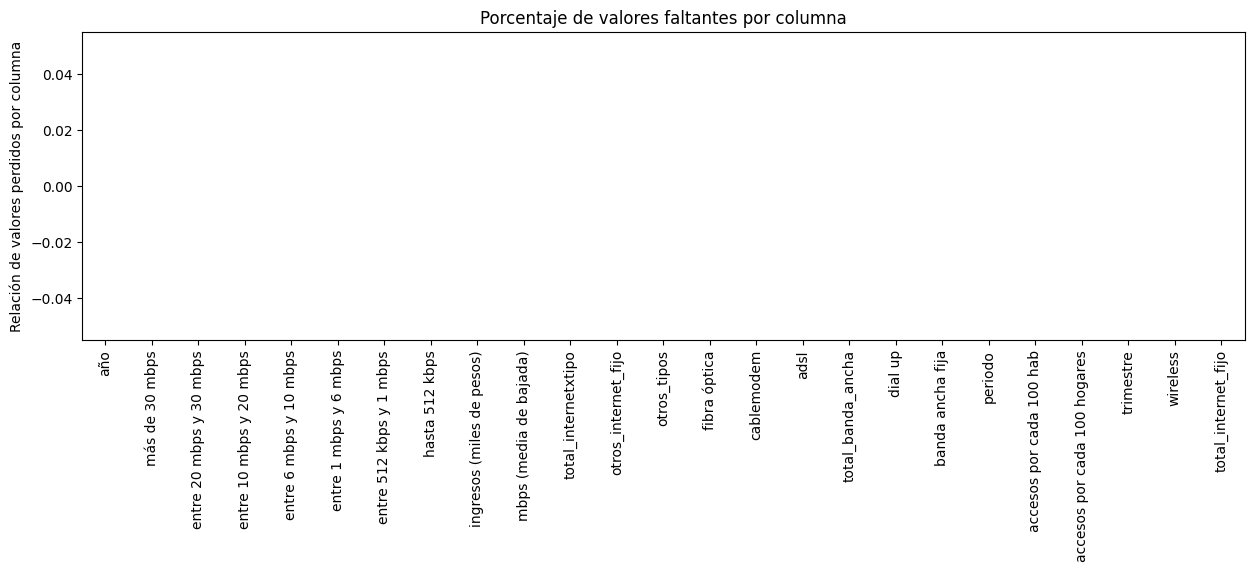

In [ ]:
#Valores faltantes por columna
merged_df_nacional.isna().mean().sort_values().plot(
    kind="bar", figsize=(15,4),
    title="Porcentaje de valores faltantes por columna",
    ylabel="Relación de valores perdidos por columna")

Se concluye que en esta base no hay valores faltantes en ninguna columna.
En total posee 35 registros no nulos y 24 columnas 
no posee valores duplicados

In [ ]:
merged_df_nacional.to_csv("datos_nacional.csv", index=False)

Tercer Daata Set referidos a la ubicación de la conectividad son los archivos: 13,14,15,16

In [ ]:
# Carga el archivo de Excel en un DataFrame
df13 = pd.read_excel('13.xlsx')

In [ ]:
# Imprime los tipos de datos de cada columna
print(df13.dtypes)
print(df13.head(3))

Provincia      object
Partido        object
Localidad      object
Link Indec     object
Otros          object
               ...   
85 mbps       float64
90 mbps       float64
92 mbps       float64
95 mbps       float64
100 mbps       object
Length: 83, dtype: object
      Provincia     Partido        Localidad Link Indec Otros  0,256 mbps   
0  BUENOS AIRES  25 de Mayo       25 de Mayo    6854100   NaN         NaN  \
1  BUENOS AIRES  25 de Mayo  Agustín Mosconi    6854010   NaN         NaN   
2  BUENOS AIRES  25 de Mayo        Del Valle    6854020   NaN         NaN   

   0,375 mbps 0,5 mbps  0,512 mbps  0,625 mbps  ... 75 mbps 78 mbps  80 mbps   
0         NaN        2         NaN         NaN  ...     NaN     NaN      9.0  \
1         NaN      NaN         NaN         NaN  ...     NaN     NaN      NaN   
2         NaN        1         NaN         NaN  ...     NaN     NaN      NaN   

  82 mbps 83 mbps  85 mbps  90 mbps 92 mbps  95 mbps 100 mbps  
0     NaN     NaN      NaN      NaN   

In [ ]:
df13.describe()

,"0,256 mbps","0,375 mbps","0,512 mbps","0,625 mbps","1,25 mbps","2,2 mbps","2,5 mbps","3,3 mbps","4,5 mbps","6,4 mbps",...,65 mbps,66 mbps,78 mbps,80 mbps,82 mbps,83 mbps,85 mbps,90 mbps,92 mbps,95 mbps
count,29.000000,1.0,524.000000,1.0,1.0,1.0,3.000000,1.0,1.0,1.0,...,2.000000,1.0,1.0,16.000000,1.0,1.0,1.0,2.000000,2.000000,1.0
mean,3.379310,225.0,2.173664,111.0,25.0,26.0,59.666667,6.0,65.0,13.0,...,7.000000,1.0,2.0,174.687500,1.0,1.0,14.0,2.000000,1.500000,1.0
std,6.411005,NaN,4.822112,NaN,NaN,NaN,47.648015,NaN,NaN,NaN,...,8.485281,NaN,NaN,300.673182,NaN,NaN,NaN,1.414214,0.707107,NaN
min,1.000000,225.0,1.000000,111.0,25.0,26.0,25.000000,6.0,65.0,13.0,...,1.000000,1.0,2.0,1.000000,1.0,1.0,14.0,1.000000,1.000000,1.0
25%,1.000000,225.0,1.000000,111.0,25.0,26.0,32.500000,6.0,65.0,13.0,...,4.000000,1.0,2.0,7.000000,1.0,1.0,14.0,1.500000,1.250000,1.0
50%,1.000000,225.0,1.000000,111.0,25.0,26.0,40.000000,6.0,65.0,13.0,...,7.000000,1.0,2.0,30.000000,1.0,1.0,14.0,2.000000,1.500000,1.0
75%,3.000000,225.0,1.000000,111.0,25.0,26.0,77.000000,6.0,65.0,13.0,...,10.000000,1.0,2.0,114.750000,1.0,1.0,14.0,2.500000,1.750000,1.0
max,31.000000,225.0,61.000000,111.0,25.0,26.0,114.000000,6.0,65.0,13.0,...,13.000000,1.0,2.0,952.000000,1.0,1.0,14.0,3.000000,2.000000,1.0


In [ ]:
# Crear una lista con los nombres de las columnas que contienen valores numéricos
columnas_numericas = df13.select_dtypes(include='number').columns.tolist()
print(columnas_numericas)

['0,256 mbps', '0,375 mbps', '0,512 mbps', '0,625 mbps', '1,25 mbps', '2,2 mbps', '2,5 mbps', '3,3 mbps', '4,5 mbps', '6,4 mbps', '7,5 mbps', '11 mbps', '13 mbps', '14 mbps', '17 mbps', '19 mbps', '21 mbps', '22 mbps', '23 mbps', '25,1 mbps', '25,11 mbps', '25,5 mbps', '26 mbps', '31 mbps', '32 mbps', '34 mbps', '35 mbps', '36 mbps', '38 mbps', '39 mbps', '41 mbps', '45 mbps', '46 mbps', '49 mbps', '55 mbps', '58 mbps', '59 mbps', '61 mbps', '62 mbps', '64 mbps', '65 mbps', '66 mbps', '78 mbps', '80 mbps', '82 mbps', '83 mbps', '85 mbps', '90 mbps', '92 mbps', '95 mbps']


In [ ]:
string_columns13 = list(df13.select_dtypes(include='object').columns)
print(string_columns13)


['Provincia', 'Partido', 'Localidad', 'Link Indec', 'Otros', '0,5 mbps', '0,75 mbps', '1 mbps', '1,5 mbps', '2 mbps', '3 mbps', '3,5 mbps', '4 mbps', '5 mbps', '6 mbps', '7 mbps', '8 mbps', '9 mbps', '10 mbps', '12 mbps', '15 mbps', '16 mbps', '18 mbps', '20 mbps', '24 mbps', '25 mbps', '30 mbps', '40 mbps', '50 mbps', '60 mbps', '70 mbps', '75 mbps', '100 mbps']


In [ ]:
# Convertir la columna 'Otros' a valores numéricos y convertir los valores no numéricos en cero
df13['Otros'] = pd.to_numeric(df13['Otros'], errors='coerce').fillna(0)


In [ ]:
# lista con los nombres de las columnas a modificar
columnas_mbMal = ['0,5 mbps', '0,75 mbps', '1 mbps', '1,5 mbps', '2 mbps', '3 mbps', '3,5 mbps', '4 mbps', '5 mbps', '6 mbps', '7 mbps', '8 mbps', '9 mbps', '10 mbps', '12 mbps', '15 mbps', '16 mbps', '18 mbps', '20 mbps', '24 mbps', '25 mbps', '30 mbps', '40 mbps', '50 mbps', '60 mbps', '70 mbps', '75 mbps', '100 mbps']

# aplicar la función pd.to_numeric a las columnas de la lista
df13[columnas_mbMal] = df13[columnas_mbMal].apply(pd.to_numeric, errors='coerce').fillna(0)


In [ ]:
df13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3098 entries, 0 to 3097
Data columns (total 83 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   3098 non-null   object 
 1   Partido     3098 non-null   object 
 2   Localidad   3098 non-null   object 
 3   Link Indec  3098 non-null   object 
 4   Otros       3098 non-null   float64
 5   0,256 mbps  29 non-null     float64
 6   0,375 mbps  1 non-null      float64
 7   0,5 mbps    3098 non-null   float64
 8   0,512 mbps  524 non-null    float64
 9   0,625 mbps  1 non-null      float64
 10  0,75 mbps   3098 non-null   float64
 11  1 mbps      3098 non-null   float64
 12  1,25 mbps   1 non-null      float64
 13  1,5 mbps    3098 non-null   float64
 14  2 mbps      3098 non-null   float64
 15  2,2 mbps    1 non-null      float64
 16  2,5 mbps    3 non-null      float64
 17  3 mbps      3098 non-null   float64
 18  3,3 mbps    1 non-null      float64
 19  3,5 mbps    3098 non-null  

In [ ]:
datos_unicos(df13)

Valores únicos por columna 'Provincia': ['BUENOS AIRES' 'CABA' 'CATAMARCA' 'CHACO' 'CHUBUT' 'CORDOBA' 'CORRIENTES'
 'ENTRE RIOS' 'FORMOSA' 'JUJUY' 'LA PAMPA' 'LA RIOJA' 'MENDOZA' 'MISIONES'
 'NEUQUEN' 'RIO NEGRO' 'SALTA' 'SAN JUAN' 'SAN LUIS' 'SANTA CRUZ'
 'SANTA FE' 'SANTIAGO DEL ESTERO' 'TIERRA DEL FUEGO' 'TUCUMAN']
Valores únicos por columna 'Partido': ['25 de Mayo' '9 de Julio' 'Adolfo Alsina' 'Adolfo Gonzales Chaves'
 'Alberti' 'Almirante Brown' 'AMBA' 'Arrecifes' 'Avellaneda' 'Ayacucho'
 'Azul' 'Bahía Blanca' 'Balcarce' 'Baradero' 'Benito Juárez' 'Berazategui'
 'Berisso' 'Bolívar' 'Bragado' 'Brandsen' 'Campana' 'Cañuelas'
 'Capitán Sarmiento' 'Carlos Casares' 'Carlos Tejedor' 'Carmen de Areco'
 'Castelli' 'Chacabuco' 'Chascomús' 'Chivilcoy' 'Colón'
 'Coronel de Marina L. Rosales' 'Coronel Dorrego' 'Coronel Pringles'
 'Coronel Suárez' 'Daireaux' 'Dolores' 'Ensenada' 'Escobar'
 'Esteban Echeverría' 'Exaltación de la Cruz' 'Ezeiza' 'Florencio Varela'
 'Florentino Ameghino' 'General 

In [ ]:
columnas_Mbps = [col for col in df13.columns if 'mbps' in col]
df13[columnas_Mbps] = df13[columnas_Mbps].fillna(0)

In [ ]:
string_columns13 = list(df13.select_dtypes(include='object').columns)
print(string_columns13)

['Provincia', 'Partido', 'Localidad', 'Link Indec']


In [ ]:
df13 = df13.drop('Link Indec', axis=1)

In [ ]:
# Crear una columna nueva que sume todos los Mbps en una sola columna

df13['Suma_Mb'] = df13[columnas_Mbps].sum(axis=1)+df13['Otros']
df13["Suma_Mb"] = df13["Suma_Mb"].astype(np.int64)


In [ ]:
columnas_Mbps = [col for col in df13.columns if 'mbps' in col.lower()]

df13['Count_Suma_Mb'] = df13[columnas_Mbps].apply(lambda row: (row > 0).sum(), axis=1)


In [ ]:
df13.info()
df13.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3098 entries, 0 to 3097
Data columns (total 84 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3098 non-null   object 
 1   Partido        3098 non-null   object 
 2   Localidad      3098 non-null   object 
 3   Otros          3098 non-null   float64
 4   0,256 mbps     3098 non-null   float64
 5   0,375 mbps     3098 non-null   float64
 6   0,5 mbps       3098 non-null   float64
 7   0,512 mbps     3098 non-null   float64
 8   0,625 mbps     3098 non-null   float64
 9   0,75 mbps      3098 non-null   float64
 10  1 mbps         3098 non-null   float64
 11  1,25 mbps      3098 non-null   float64
 12  1,5 mbps       3098 non-null   float64
 13  2 mbps         3098 non-null   float64
 14  2,2 mbps       3098 non-null   float64
 15  2,5 mbps       3098 non-null   float64
 16  3 mbps         3098 non-null   float64
 17  3,3 mbps       3098 non-null   float64
 18  3,5 mbps

,Provincia,Partido,Localidad,Otros,"0,256 mbps","0,375 mbps","0,5 mbps","0,512 mbps","0,625 mbps","0,75 mbps",...,80 mbps,82 mbps,83 mbps,85 mbps,90 mbps,92 mbps,95 mbps,100 mbps,Suma_Mb,Count_Suma_Mb
0,BUENOS AIRES,25 de Mayo,25 de Mayo,0.0,0.0,0.0,2.0,0.0,0.0,19.0,...,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2202,13
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58,2
2,BUENOS AIRES,25 de Mayo,Del Valle,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,192,3
3,BUENOS AIRES,25 de Mayo,Ernestina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66,1
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181,8


In [ ]:
# Eliminar las columnas que contienen 'Mbps' en su título
columnas_eliminar = [col for col in df13.columns if 'mbps' in col]
df13 = df13.drop(columns=columnas_eliminar)

df13 = df13.drop(columns=['Otros'])

# Mostrar el dataframe resultante
print(df13.dtypes)

Provincia        object
Partido          object
Localidad        object
Suma_Mb           int64
Count_Suma_Mb     int64
dtype: object


In [ ]:
df13.head(5)

,Provincia,Partido,Localidad,Suma_Mb,Count_Suma_Mb
0,BUENOS AIRES,25 de Mayo,25 de Mayo,2202,13
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,58,2
2,BUENOS AIRES,25 de Mayo,Del Valle,192,3
3,BUENOS AIRES,25 de Mayo,Ernestina,66,1
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,181,8


In [ ]:
# Imprime los tipos de datos de cada columna
print(df14.dtypes)
print(df14.info)

Provincia        object
Partido          object
Localidad        object
Link Indec       object
ADSL             object
CABLEMODEM       object
DIAL UP          object
FIBRA OPTICA     object
OTROS            object
SATELITAL        object
WIMAX            object
WIRELESS         object
Total general    object
dtype: object
<bound method DataFrame.info of          Provincia      Partido                           Localidad   
0     BUENOS AIRES   25 de Mayo                          25 de Mayo  \
1     BUENOS AIRES   25 de Mayo                           Del Valle   
2     BUENOS AIRES   25 de Mayo                   Gobernador Ugarte   
3     BUENOS AIRES   25 de Mayo              Norberto de la Riestra   
4     BUENOS AIRES   25 de Mayo                    Lucas Monteverde   
...            ...          ...                                 ...   
3137       TUCUMAN   Tafí Viejo  Villa Mariano Moreno - El Colmenar   
3138       TUCUMAN      Trancas                San Pedro de Colalao   
313

In [ ]:
df14.describe()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
count,3142,3142,3142,3142,3142,3142,3142,3142,3142,3142,3142,3142,3142
unique,24,432,2850,2718,724,693,86,706,219,24,12,606,1348
top,BUENOS AIRES,General Roca,OTROS,Sin Datos,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,1
freq,716,57,69,72,2016,2295,2760,1743,2537,2089,3131,934,193


In [ ]:
datos_unicos(df14)

Valores únicos por columna 'Provincia': ['BUENOS AIRES' 'CABA' 'CATAMARCA' 'CHACO' 'CHUBUT' 'CORDOBA' 'CORRIENTES'
 'ENTRE RIOS' 'FORMOSA' 'JUJUY' 'LA PAMPA' 'LA RIOJA' 'MENDOZA' 'MISIONES'
 'NEUQUEN' 'RIO NEGRO' 'SALTA' 'SAN JUAN' 'SAN LUIS' 'SANTA CRUZ'
 'SANTA FE' 'SANTIAGO DEL ESTERO' 'TIERRA DEL FUEGO' 'TUCUMAN']
Valores únicos por columna 'Partido': ['25 de Mayo' '9 de Julio' 'Adolfo Alsina' 'Adolfo Gonzales Chaves'
 'Alberti' 'Almirante Brown' 'Arrecifes' 'Avellaneda' 'Ayacucho' 'Azul'
 'Bahía Blanca' 'Balcarce' 'Baradero' 'Benito Juárez' 'Berazategui'
 'Berisso' 'Bolívar' 'Bragado' 'Brandsen' 'Campana' 'Cañuelas'
 'Capitán Sarmiento' 'Carlos Casares' 'Carlos Tejedor' 'Carmen de Areco'
 'Castelli' 'Chacabuco' 'Chascomús' 'Chivilcoy' 'Colón'
 'Coronel de Marina L. Rosales' 'Coronel Dorrego' 'Coronel Pringles'
 'Coronel Suárez' 'Daireaux' 'Dolores' 'Ensenada' 'Escobar'
 'Esteban Echeverría' 'Exaltación de la Cruz' 'Ezeiza' 'Florencio Varela'
 'Florentino Ameghino' 'General Alvarad

In [ ]:
valor = '- 0'
valor_reemplazado = valor.replace('- 0', '0')

In [ ]:
string_columns14 = list(df14.select_dtypes(include='object').columns)
print(string_columns14)

['Provincia', 'Partido', 'Localidad', 'Link Indec', 'ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS', 'Total general']


In [ ]:
df14 = df14.drop('Link Indec', axis=1)

In [ ]:
df14.columns = df14.columns.str.capitalize()

In [ ]:
columnas = df14.columns
print(columnas)

Index(['Provincia', 'Partido', 'Localidad', 'Adsl', 'Cablemodem', 'Dial up',
       'Fibra optica', 'Otros', 'Satelital', 'Wimax', 'Wireless',
       'Total general'],
      dtype='object')


In [ ]:
# Definimos las columnas a convertir
columnas = ['Adsl', 'Cablemodem', 'Dial up', 'Fibra optica', 'Otros', 'Satelital', 'Wimax', 'Wireless','Total general']

df14[columnas] = df14[columnas].replace('- 0', 0)

In [ ]:
# Iteramos sobre las columnas y las convertimos a tipo int64
for col in columnas:
    
    df14[col] = df14[col].astype('int64')
    
# Imprimimos el DataFrame resultante
print(df14.head(3))


      Provincia     Partido          Localidad  Adsl  Cablemodem  Dial up   
0  BUENOS AIRES  25 de Mayo         25 de Mayo   873        4704        0  \
1  BUENOS AIRES  25 de Mayo          Del Valle   181           0        0   
2  BUENOS AIRES  25 de Mayo  Gobernador Ugarte     0           0        0   

   Fibra optica  Otros  Satelital  Wimax  Wireless  Total general  
0             2      0        975      0       664           7218  
1             0     10          1      0         0            192  
2             0      0          0      0       181            181  


In [ ]:
df14 = df14.rename(columns={'Dial up': 'Dialup'})
df14 = df14.rename(columns={'Fibra optica': 'Fibraoptica'})


In [ ]:
# Imprime los tipos de datos de cada columna
print(df15.dtypes)
print(df15.info)

Provincia        object
Partido          object
Localidad        object
ADSL             object
CABLEMODEM       object
DIALUP           object
FIBRAOPTICA      object
4G               object
3G               object
TELEFONIAFIJA    object
WIRELESS         object
SATELITAL        object
dtype: object
<bound method DataFrame.info of          Provincia       Partido        Localidad ADSL CABLEMODEM DIALUP   
0     BUENOS AIRES  Bahía Blanca    Villa Bordeau   --         --     --  \
1     BUENOS AIRES  Bahía Blanca     Villa Espora   --         --     --   
2     BUENOS AIRES      Balcarce         Balcarce   SI         SI     SI   
3     BUENOS AIRES      Balcarce        Los Pinos   --         --     --   
4     BUENOS AIRES      Balcarce        Napaleofú   --         --     --   
...            ...           ...              ...  ...        ...    ...   
4307         CHACO     Quitilipi        Quitilipi   SI         --     --   
4308         CHACO     Quitilipi  Villa El Palmar   --    

In [ ]:
df15.columns = df15.columns.str.capitalize()

In [ ]:
datos_unicos(df15)

Valores únicos por columna 'Provincia': ['BUENOS AIRES' 'CHUBUT' 'MISIONES' 'CABA' 'CHACO' 'CORDOBA' 'ENTRE RIOS'
 'RIO NEGRO' 'JUJUY' 'FORMOSA' 'LA PAMPA' 'MENDOZA' 'SALTA' 'NEUQUEN'
 'SAN JUAN' 'SAN LUIS' 'SANTA FE' 'SANTIAGO DEL ESTERO' 'TUCUMAN'
 'TIERRA DEL FUEGO' 'SANTA CRUZ' 'LA RIOJA' 'CORRIENTES' 'CATAMARCA']
Valores únicos por columna 'Partido': ['Bahía Blanca' 'Balcarce' 'Baradero' 'Benito Juárez' 'Futaleufú'
 'General Las Heras' 'General Lavalle' 'General Paz' 'General Pinto'
 'San Ignacio' 'Magdalena' 'Maipú' 'Malvinas Argentinas' 'San Fernando'
 'San Isidro' 'COMUNA 04' 'San Lorenzo' 'Tandil' 'Tapalqué' 'Tigre'
 'COMUNA 10' 'Gaiman' 'San Miguel' 'Cruz del Eje' 'Berisso' 'Bolívar'
 'Bragado' 'COMUNA 12' 'Río Cuarto' 'Sargento Cabral' 'Tapenagá' 'Biedma'
 'General Pueyrredón' 'General Rodríguez' 'COMUNA 05' 'Escalante'
 'Florentino Ameghino' 'Mar Chiquita' 'Marcos Paz' 'Mercedes'
 'Berazategui' 'Totoral' 'Colón' 'San Nicolás' 'San Pedro' 'San Vicente'
 'Suipacha' 'Gastre' '

In [ ]:
print(df15.dtypes)

Provincia        object
Partido          object
Localidad        object
Adsl             object
Cablemodem       object
Dialup           object
Fibraoptica      object
4g               object
3g               object
Telefoniafija    object
Wireless         object
Satelital        object
dtype: object


In [ ]:
df15 = df15.rename(columns={'Dial up': 'Dialup'})
df15 = df15.rename(columns={'Fibra optica': 'Fibraoptica'})

In [ ]:
columnas = ['Adsl', 'Cablemodem', 'Dialup', 'Fibraoptica', '4g', '3g','Telefoniafija','Wireless','Satelital']
df15[columnas] = df15[columnas].replace('--', 0)
df15[columnas] = df15[columnas].replace('SI', 1)
df15[columnas] = df15[columnas].astype('int64')

In [ ]:
df15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provincia      4312 non-null   object
 1   Partido        4312 non-null   object
 2   Localidad      4312 non-null   object
 3   Adsl           4312 non-null   int64 
 4   Cablemodem     4312 non-null   int64 
 5   Dialup         4312 non-null   int64 
 6   Fibraoptica    4312 non-null   int64 
 7   4g             4312 non-null   int64 
 8   3g             4312 non-null   int64 
 9   Telefoniafija  4312 non-null   int64 
 10  Wireless       4312 non-null   int64 
 11  Satelital      4312 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 404.4+ KB


In [ ]:
df16.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      4312 non-null   object 
 1   Partido        4312 non-null   object 
 2   Localidad      4312 non-null   object 
 3   Poblacion      4312 non-null   int64  
 4   ADSL           4312 non-null   object 
 5   CABLEMODEM     4312 non-null   object 
 6   DIALUP         4312 non-null   object 
 7   FIBRAOPTICA    4312 non-null   object 
 8   SATELITAL      4312 non-null   object 
 9   WIRELESS       4312 non-null   object 
 10  TELEFONIAFIJA  4312 non-null   object 
 11  3G             4312 non-null   object 
 12  4G             4312 non-null   object 
 13  link           4300 non-null   float64
 14  Latitud        4312 non-null   object 
 15  Longitud       4312 non-null   object 
dtypes: float64(1), int64(1), object(14)
memory usage: 539.1+ KB


In [ ]:
df16.columns = df16.columns.str.capitalize()

In [ ]:
datos_unicos(df16)

Valores únicos por columna 'Provincia': ['BUENOS AIRES' 'CHUBUT' 'MISIONES' 'CABA' 'CHACO' 'CORDOBA' 'ENTRE RIOS'
 'RIO NEGRO' 'JUJUY' 'FORMOSA' 'LA PAMPA' 'MENDOZA' 'SALTA' 'NEUQUEN'
 'SAN JUAN' 'SAN LUIS' 'SANTA FE' 'SANTIAGO DEL ESTERO' 'TUCUMAN'
 'TIERRA DEL FUEGO' 'SANTA CRUZ' 'LA RIOJA' 'CORRIENTES' 'CATAMARCA']
Valores únicos por columna 'Partido': ['Bahía Blanca' 'Balcarce' 'Baradero' 'Benito Juárez' 'Futaleufú'
 'General Las Heras' 'General Lavalle' 'General Paz' 'General Pinto'
 'San Ignacio' 'Magdalena' 'Maipú' 'Malvinas Argentinas' 'San Fernando'
 'San Isidro' 'COMUNA 04' 'San Lorenzo' 'Tandil' 'Tapalqué' 'Tigre'
 'COMUNA 10' 'Gaiman' 'San Miguel' 'Cruz del Eje' 'Berisso' 'Bolívar'
 'Bragado' 'COMUNA 12' 'Río Cuarto' 'Sargento Cabral' 'Tapenagá' 'Biedma'
 'General Pueyrredón' 'General Rodríguez' 'COMUNA 05' 'Escalante'
 'Florentino Ameghino' 'Mar Chiquita' 'Marcos Paz' 'Mercedes'
 'Berazategui' 'Totoral' 'Colón' 'San Nicolás' 'San Pedro' 'San Vicente'
 'Suipacha' 'Gastre' '

In [ ]:
df16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      4312 non-null   object 
 1   Partido        4312 non-null   object 
 2   Localidad      4312 non-null   object 
 3   Poblacion      4312 non-null   int64  
 4   Adsl           4312 non-null   object 
 5   Cablemodem     4312 non-null   object 
 6   Dialup         4312 non-null   object 
 7   Fibraoptica    4312 non-null   object 
 8   Satelital      4312 non-null   object 
 9   Wireless       4312 non-null   object 
 10  Telefoniafija  4312 non-null   object 
 11  3g             4312 non-null   object 
 12  4g             4312 non-null   object 
 13  Link           4300 non-null   float64
 14  Latitud        4312 non-null   object 
 15  Longitud       4312 non-null   object 
dtypes: float64(1), int64(1), object(14)
memory usage: 539.1+ KB


In [ ]:
columnas16 = ['Adsl', 'Cablemodem', 'Dialup', 'Fibraoptica','Satelital', 'Wireless','4g', '3g','Telefoniafija']
df16[columnas16] = df16[columnas16].replace('--', 0)
df16[columnas16] = df16[columnas16].replace('SI', 1)
df16[columnas16] = df16[columnas16].astype('int64')


In [ ]:
df16 = df16.drop('Link', axis=1)

In [ ]:
df16['Latitud'] = pd.to_numeric(df16['Latitud'].str.replace(',', '.').replace(r'\.+', '.', regex=True))
df16['Longitud'] = pd.to_numeric(df16['Longitud'].str.replace(',', '.').replace(r'\.+', '.', regex=True))



In [ ]:
df16['Latitud'] = pd.to_numeric(df16['Latitud'])
df16['Longitud'] = pd.to_numeric(df16['Longitud'])


In [ ]:
df16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      4312 non-null   object 
 1   Partido        4312 non-null   object 
 2   Localidad      4312 non-null   object 
 3   Poblacion      4312 non-null   int64  
 4   Adsl           4312 non-null   int64  
 5   Cablemodem     4312 non-null   int64  
 6   Dialup         4312 non-null   int64  
 7   Fibraoptica    4312 non-null   int64  
 8   Satelital      4312 non-null   int64  
 9   Wireless       4312 non-null   int64  
 10  Telefoniafija  4312 non-null   int64  
 11  3g             4312 non-null   int64  
 12  4g             4312 non-null   int64  
 13  Latitud        4312 non-null   float64
 14  Longitud       4312 non-null   float64
dtypes: float64(2), int64(10), object(3)
memory usage: 505.4+ KB


In [ ]:
df16.head(3)

,Provincia,Partido,Localidad,Poblacion,Adsl,Cablemodem,Dialup,Fibraoptica,Satelital,Wireless,Telefoniafija,3g,4g,Latitud,Longitud
0,BUENOS AIRES,Bahía Blanca,Villa Bordeau,0,0,0,0,0,0,0,0,1,1,-38.647261,-62.320022
1,BUENOS AIRES,Bahía Blanca,Villa Espora,0,0,0,0,0,0,0,0,0,0,-38.776507,-62.185183
2,BUENOS AIRES,Balcarce,Balcarce,38376,1,1,1,1,0,1,1,1,1,-37.848278,-58.255167


Realizo el merge de los dataset que son correspondientes a la conectividad por provincia, de los archivos: 13,14,15,16

In [ ]:
# Merge del resultado anterior con el siguiente dataframe
merged_df_conectividad = pd.merge(df13, df14, on=['Provincia', 'Partido', 'Localidad'], how="outer")

# Merge de los primeros dos dataframes
merged_df_conectividad = pd.merge(merged_df_conectividad, df16, on=['Provincia', 'Partido', 'Localidad', 'Adsl', 'Cablemodem', 'Dialup', 'Fibraoptica','Satelital', 'Wireless'], how="outer")

# Merge del resultado anterior con el siguiente dataframe
merged_df_conectividad = pd.merge(merged_df_conectividad, df15, on=['Provincia', 'Partido', 'Localidad', 'Adsl', 'Cablemodem', 'Dialup','Fibraoptica','Satelital', '3g','4g','Wireless','Telefoniafija'], how="outer")



# Convertir los títulos de las columnas a minúsculas
merged_df_conectividad.columns = merged_df_conectividad.columns.str.lower()

# Convertir todas las cadenas de texto a minúsculas
merged_df_conectividad = merged_df_conectividad.applymap(lambda s: s.lower() if isinstance(s, str) else s)
merged_df_conectividad.columns = merged_df_conectividad.columns.str.lower()

In [ ]:
string_columns13 = list(df13.select_dtypes(include='object').columns)
print(string_columns13)

['Provincia', 'Partido', 'Localidad']


In [ ]:
string_columns14 = list(df13.select_dtypes(include='object').columns)
print(string_columns14)

['Provincia', 'Partido', 'Localidad']


In [ ]:
string_columns16 = list(df13.select_dtypes(include='object').columns)
print(string_columns16)

['Provincia', 'Partido', 'Localidad']


In [ ]:
merged_df_conectividad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7317 entries, 0 to 7316
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   provincia      7317 non-null   object 
 1   partido        7317 non-null   object 
 2   localidad      7317 non-null   object 
 3   suma_mb        3098 non-null   float64
 4   count_suma_mb  3098 non-null   float64
 5   adsl           7226 non-null   float64
 6   cablemodem     7226 non-null   float64
 7   dialup         7226 non-null   float64
 8   fibraoptica    7226 non-null   float64
 9   otros          3142 non-null   float64
 10  satelital      7226 non-null   float64
 11  wimax          3142 non-null   float64
 12  wireless       7226 non-null   float64
 13  total general  3142 non-null   float64
 14  poblacion      4316 non-null   float64
 15  telefoniafija  4316 non-null   float64
 16  3g             4316 non-null   float64
 17  4g             4316 non-null   float64
 18  latitud 

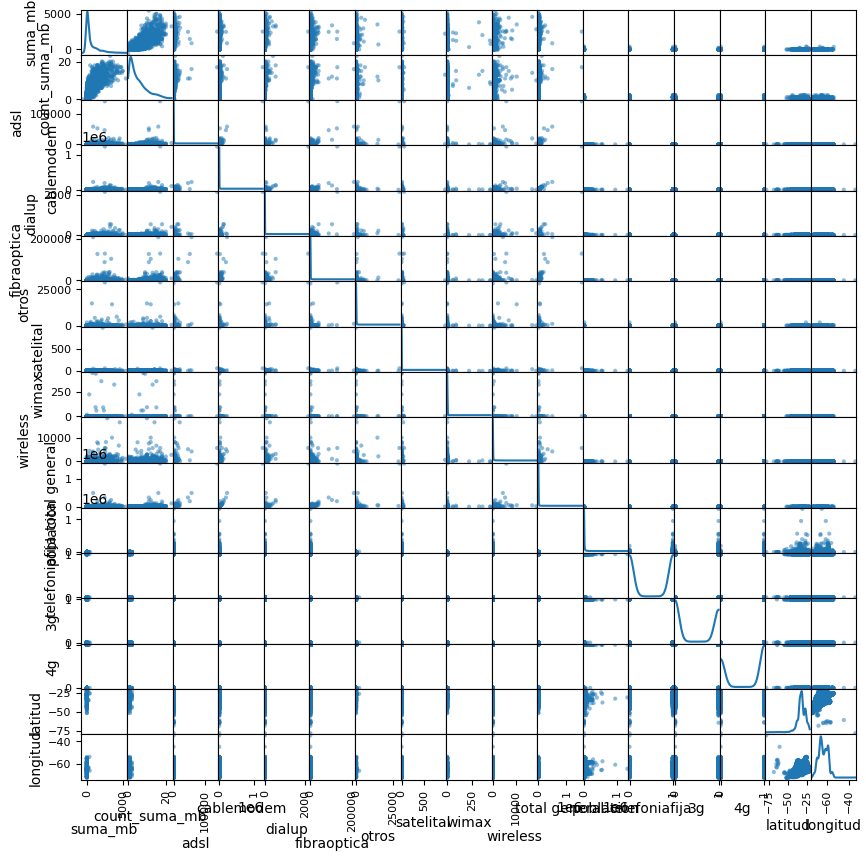

In [ ]:
# selecciono solo las columnas numéricas
df_numeric = merged_df_conectividad.select_dtypes(include=['int64', 'float64'])
# crea una matriz de gráficos de dispersión
scatter_matrix(df_numeric, figsize=(10, 10), diagonal='kde')

# muestra el gráfico
plt.show()

Se revisan mas opciones para ver la cantidad de nulos

In [ ]:
plt.figure(figsize=(10,8))
plt.imshow(merged_df_conectividad.isna(),aspect="auto",
           interpolation="nearest",cmap="gray")
plt.xlabel("Numero de columna")
plt.ylabel("Numero de muestra")

NameError: name 'merged_df_conectividad' is not defined

<Figure size 1000x800 with 0 Axes>

<Axes: title={'center': 'Porcentaje de valores faltantes por columna'}, ylabel='Relación de valores perdidos por columna'>

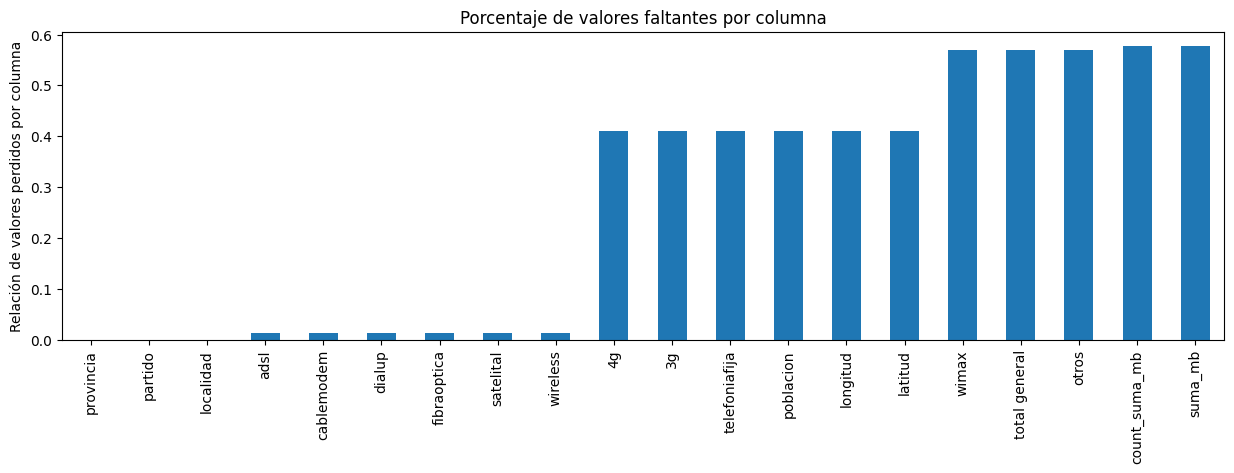

In [ ]:
#Valores faltantes por columna
merged_df_conectividad.isna().mean().sort_values().plot(
    kind="bar", figsize=(15,4),
    title="Porcentaje de valores faltantes por columna",
    ylabel="Relación de valores perdidos por columna")

In [ ]:
# cantidad de duplicados
column_names=merged_df_conectividad.columns
n_duplicates=merged_df_conectividad.drop(labels=column_names,axis=1).duplicated().sum
n_duplicates

<bound method NDFrame._add_numeric_operations.<locals>.sum of Series([], dtype: bool)>

Esta base de datos de conectividad posee muchos valores faltantes en la mayoria de sus columnas
No posee duplicados
posee 7317 registros
existen esta cantidad de nulos en estas columnas: suma_mb    4219, count_suma_mb  4219, adsl           91, cablemodem     91, dialup         91,    fibraoptica    91, otros          4175,  satelital      91, wimax          4175, wireless       91, total general  4175,   poblacion      3001, telefoniafija  3001, 3g             3001, 4g             3001, latitud        3001, longitud       3001

In [ ]:
merged_df_conectividad.to_csv('datos_conectividad.csv', index=False)


Una vez organizadas las bases de datos se procede a continuar con el EDA en power bi

In [ ]:
merged_df_conectividad.to_csv(r'E:/DataScience/Labs/PI-2/datos_conectividad.csv', index=False)
merged_df_nacional.to_csv(r'E:/DataScience/Labs/PI-2/datos_nacional.csv', index=False)
merged_df.to_csv(r'E:/DataScience/Labs/PI-2/datos_provincias.csv', index=False)